In [515]:
import pandas as pd

# Step 1: Loading the dataset
file_path = '/content/heart_disease_uci.csv'  # File Path
heart_data = pd.read_csv(file_path)

In [516]:
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [517]:
heart_data.shape

(920, 16)

### **Section 1 : Basic Analysis**



* In this section, we start by exploring the dataset to understand its structure and content. We examine data types, unique values in key columns, and the overall shape of the dataset. Additionally, we compute descriptive statistics for numerical features (excluding the id column) to gain insights into feature distributions and identify any patterns or anomalies. This step helps set the foundation for deeper analysis.

In [518]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


* The dataset contains 16 columns, of int64, object and float64 types.

* Unique values in Categorical Columns

In [519]:
for col in heart_data.columns:
    if heart_data[col].dtype == 'object':
        a = heart_data[col].unique()
        print(a)

['Male' 'Female']
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
[True False nan]
['lv hypertrophy' 'normal' 'st-t abnormality' nan]
[False True nan]
['downsloping' 'flat' 'upsloping' nan]
['fixed defect' 'normal' 'reversable defect' nan]


In [520]:
sample_cols = ['ca', 'num']
for col in sample_cols:
    unique_values = heart_data[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in ca: [ 0.  3.  2.  1. nan]
Unique values in num: [0 2 1 3 4]


In [521]:
import pandas as pd
from tabulate import tabulate

# Selecting numerical columns
numerical_features = heart_data.select_dtypes(include=['float64', 'int64']).drop(columns=['id'])  # Drop 'id' column

# Getting descriptive statistics
descriptive_stats = numerical_features.describe()

#descriptive statistics in a table format
print(tabulate(descriptive_stats, headers='keys', tablefmt='pretty', showindex=True))

+-------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       |        age        |      trestbps      |        chol        |       thalch       |      oldpeak       |         ca         |        num         |
+-------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| count |       920.0       |       861.0        |       890.0        |       865.0        |       858.0        |       309.0        |       920.0        |
| mean  | 53.51086956521739 | 132.13240418118468 | 199.13033707865168 | 137.5456647398844  | 0.8787878787878788 | 0.6763754045307443 | 0.9956521739130435 |
|  std  | 9.424685209576857 | 19.066069518587458 | 110.78081035323044 | 25.926276492797612 | 1.0912262483465265 | 0.9356530125599879 | 1.142693403338034  |
|  min  |       28.0        |        0.0         |        0.0   

### **Section 2 :  Missing Data Analysis and Imputation Strategy**

* In this section, we focus on identifying and addressing missing data in the dataset. We start by inspecting the dataset for missing values, visualizing their distribution using a heatmap, and validating the presence of outliers that could impact imputation. Additionally, we analyze correlations among numeric columns to understand relationships between features, which helps inform an appropriate imputation strategy. This step ensures data completeness and consistency for further analysis.

##### Inspect Missing Data

In [522]:
# Calculate missing values count and percentage
missing_count = heart_data.isnull().sum()
missing_percentage = (missing_count / len(heart_data)) * 100

# Display missing values and their percentage
print("Missing Values (Count and Percentage):")
missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})
print(missing_data)

Missing Values (Count and Percentage):
          Missing Count  Missing Percentage
id                    0            0.000000
age                   0            0.000000
sex                   0            0.000000
dataset               0            0.000000
cp                    0            0.000000
trestbps             59            6.413043
chol                 30            3.260870
fbs                  90            9.782609
restecg               2            0.217391
thalch               55            5.978261
exang                55            5.978261
oldpeak              62            6.739130
slope               309           33.586957
ca                  611           66.413043
thal                486           52.826087
num                   0            0.000000


###### Dataset Overview

- **Missing Values**:
    - Many features in this dataset have missing values, including `trestbps`, `chol`, `fbs`, `restecg`, `thalch`, `exang`, `oldpeak`, `slope`, `ca`, and `thal`.

- **Variable Types**:
    - **Numeric Variables**:
      - `age`, `trestbps`, `chol`, `thalch`, `oldpeak`
    - **Categorical Variables**:
      - `sex`, `dataset`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `thal`
      
- **Categorical Variable Considerations**:
    - Although `ca` & `num` appears as a numeric variable, it is actually treated as a categorical variable.
    
- **Checking Unique Values**:
    - It is important for us to check the unique values in each variable to determine:
        - Whether the variable should be included in the dataset.
        - If there are any categorical values that need encoding or transformation before processing.

##### Outlier Validation & Outlier Percentage

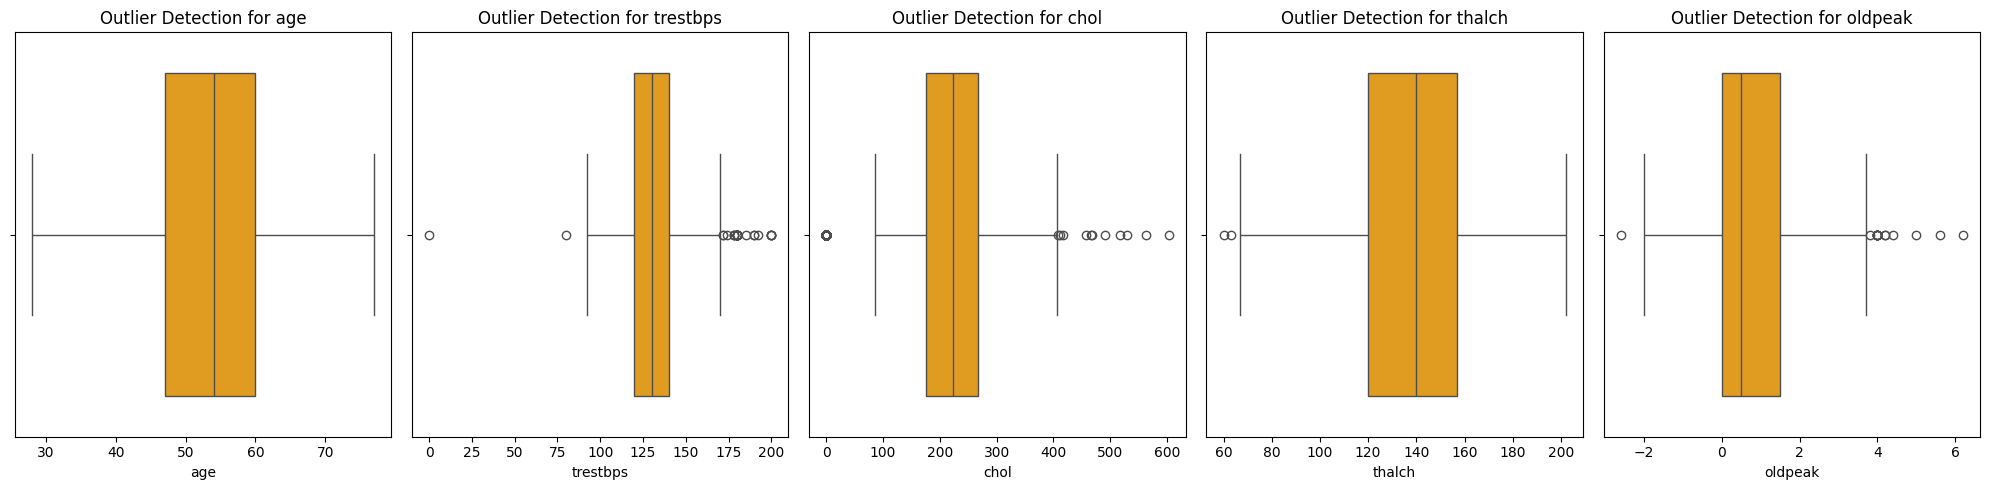

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Features - Outlier Detection
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Creating a single row of subplots for boxplots (1 row, len(numerical_features) columns)
fig, axes = plt.subplots(1, len(numerical_features), figsize=(20, 5))

# Plot boxplots for numerical features
for i, col in enumerate(numerical_features):
    sns.boxplot(data=heart_data, x=col, ax=axes[i], color='orange')
    axes[i].set_title(f"Outlier Detection for {col}")

plt.tight_layout()
plt.show()

* Below is calculation for percentage of outliers for numerical features.


In [524]:
import pandas as pd

# Function to calculate outlier percentage
def calculate_outliers(data, feature):
    # Calculate Q1, Q3, and IQR
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as data points outside 1.5 * IQR range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Calculate outlier percentage
    outlier_percentage = (len(outliers) / len(data)) * 100
    return outlier_percentage

# Calculate outlier percentage for each feature
outlier_percentages = {feature: calculate_outliers(heart_data, feature) for feature in numerical_features}

# Display outlier percentages
outlier_percentages


{'age': 0.0,
 'trestbps': 3.0434782608695654,
 'chol': 19.891304347826086,
 'thalch': 0.21739130434782608,
 'oldpeak': 1.7391304347826086}

* In healthcare data, *upper outliers are more common than lower outliers* for many features. This is because physiological and clinical metrics often have natural lower bounds, but no strict upper limits.

- age: 0.0% of the data points are outliers in the age feature.
  - This means all the values for age fall within the acceptable range (based on the 1.5 * IQR rule).
  - The dataset consists of middle-aged patients, with most falling between 50 and 60 years old.
- trestbps (resting blood pressure): 3.04% of the data points are outliers.
  - A small percentage of the trestbps values lie outside the typical range, indicating a few extreme values.
- chol (cholesterol): 19.89% of the data points are outliers.
  - A higher percentage of chol values are outliers, suggesting that many patients have extreme cholesterol levels that are either very high or low.
- thalch (maximum heart rate achieved): 0.22% of the data points are outliers.
  - Very few thalch values are considered outliers, meaning the heart rate values are mostly within the normal range.
- oldpeak (ST depression induced by exercise): 1.74% of the data points are outliers.
  - A small percentage of oldpeak values are outliers, indicating some patients may show extreme signs of stress during exercise.

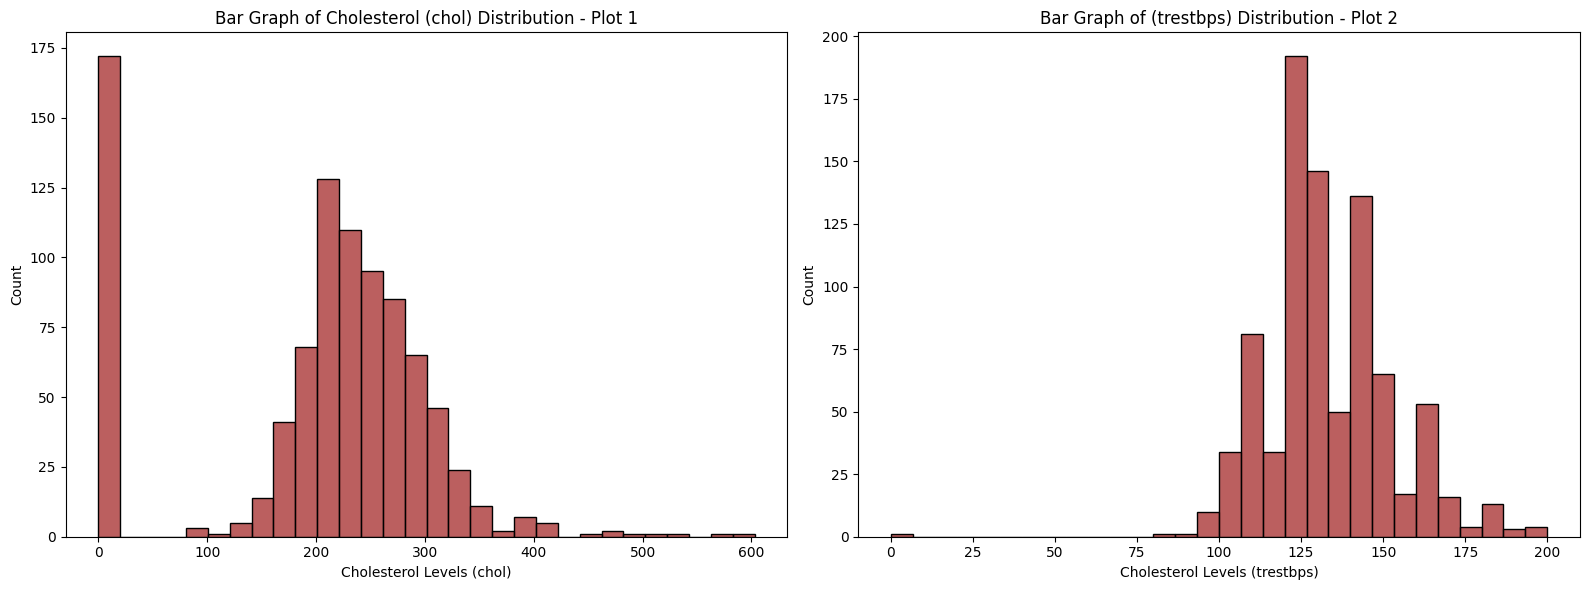

In [525]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting bar graph for 'chol' side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plotting bar graph for 'chol'
sns.histplot(heart_data['chol'], kde=False, color="brown", bins=30, ax=axes[0])
axes[0].set_title('Bar Graph of Cholesterol (chol) Distribution - Plot 1')
axes[0].set_xlabel('Cholesterol Levels (chol)')
axes[0].set_ylabel('Count')

# Plotting bar graph for 'trestbps'
sns.histplot(heart_data['trestbps'], kde=False, color="brown", bins=30, ax=axes[1])
axes[1].set_title('Bar Graph of (trestbps) Distribution - Plot 2')
axes[1].set_xlabel('Cholesterol Levels (trestbps)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

* The '**trestbps**' (resting blood pressure) feature has one instance of 0, which is not realistic. This value should be replaced with the mode or median of the feature.
* The '**chol**' (cholesterol) feature has 172 instances of 0, which are unrealistic. These values should be replaced with the mode/median or treated as missing data and imputed appropriately.

In [526]:
import numpy as np

# Replace zeros with NaN for columns where zeros are invalid
heart_data['trestbps'] = heart_data['trestbps'].replace(0, np.nan)
heart_data['chol'] = heart_data['chol'].replace(0, np.nan)

In [527]:
# Recalculate missing values after replacing zeros with NaN
missing_count = heart_data.isnull().sum()
missing_percentage = (missing_count / len(heart_data)) * 100

# Display missing values and their percentage
missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

# Display the result
print(missing_data)

          Missing Count  Missing Percentage
id                    0            0.000000
age                   0            0.000000
sex                   0            0.000000
dataset               0            0.000000
cp                    0            0.000000
trestbps             60            6.521739
chol                202           21.956522
fbs                  90            9.782609
restecg               2            0.217391
thalch               55            5.978261
exang                55            5.978261
oldpeak              62            6.739130
slope               309           33.586957
ca                  611           66.413043
thal                486           52.826087
num                   0            0.000000


##### Visual Inspection and Analysis of Missing Data

* **Heatmap of Missing Values**

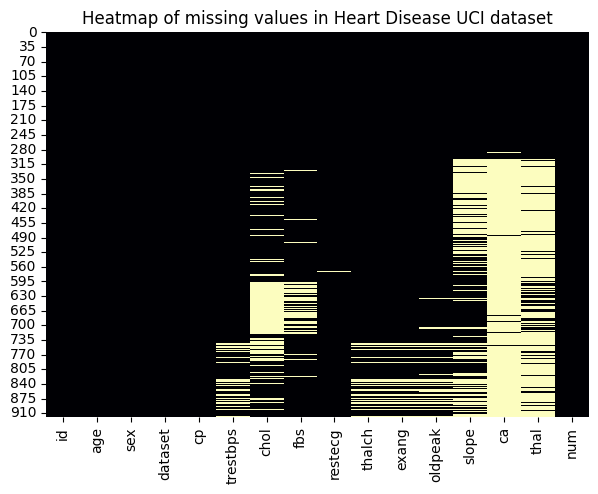

In [528]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(heart_data.isnull(), cmap='magma', cbar=False)
plt.title('Heatmap of missing values in Heart Disease UCI dataset')
plt.show();

  - Missing values appear intensively starting from the 300th row in the dataset.
  - The top three variables with the highest number of missing values are:
    - `slope`
    - `ca`
    - `thal`
  - The distribution of missing values does not appear to be random.
  - We will validating correlation between missing values in different variables.
  - MCAR : Features like chol, trestbps, fbs, and restecg may display missingness that is not related to other variables (due to random missingness).
  - MAR : ca and thal may exhibit missingness that is related to observed data. For example, certain groups with specific conditions might have missing values in these columns.
  - NMAR : ca and thal could also display NMAR if the missingness is due to characteristics of the data itself (e.g., severe cases where specific tests or features are not recorded).

* **Correlation Matrix of Numeric Columns**

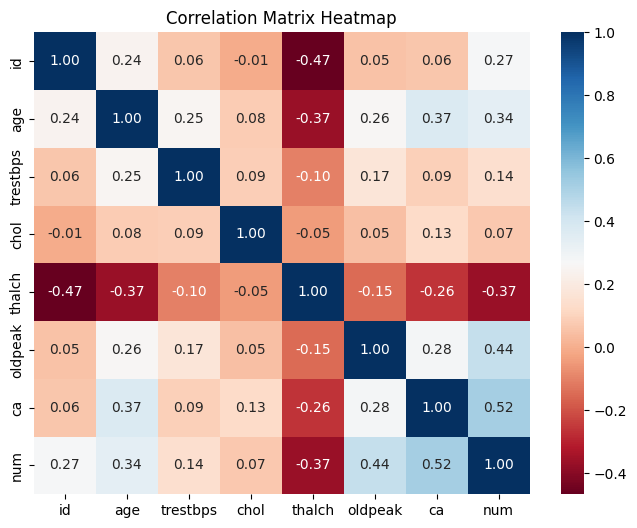

In [529]:
import matplotlib.pyplot as plt
import seaborn as sns

# This code selects columns of type float64 and then converts the resulting Index object to a list.
heart_data_num = heart_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
correlation_matrix  = heart_data[heart_data_num].corr()
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

###### Insights from the Correlation Matrix

##### 1. Key Predictors of Heart Disease Severity (`num`)
- **Number of Affected Vessels (`ca`)**
  - Shows a **moderate positive correlation** with `num` (0.52).
  - Insight: Patients with more blocked or affected vessels tend to have more severe heart conditions.

- **ST Depression (`oldpeak`)**
  - Has a **moderate positive correlation** with `num` (0.44).
  - Insight: Higher `oldpeak` values, indicating increased heart stress during exercise, are linked to greater heart disease severity.


##### 2. Heart Rate and Its Importance
- **Maximum Heart Rate Achieved (`thalach`)**
  - Displays a **moderate negative correlation** with `num` (-0.37).
  - Insight: Patients with higher maximum heart rates are less likely to have severe heart conditions.

##### 3. Lesser Impact of Cholesterol and Blood Pressure
- **Cholesterol Levels (`chol`)**
  - Shows a **very weak positive correlation** with `num` (0.07).
  - Insight: Cholesterol levels in this dataset do not strongly predict heart disease severity.

- **Resting Blood Pressure (`trestbps`)**
  - Has a **weak positive correlation** with `num` (0.14).
  - Insight: Resting blood pressure has limited predictive value for heart disease severity.


##### 4. Other Notable Relationships
- **ST Depression (`oldpeak`) and Number of Affected Vessels (`ca`)**
  - Displays a **weak positive correlation** (0.28).
  - Insight: Higher `oldpeak` values may coincide with an increased number of affected vessels, hinting at overlapping cardiac issues.

#####  Imputation Approach Based on Missingness Types (MCAR, MAR, and NMAR)

* **Imputation Strategy Justification**

###### 1. **MCAR (Missing Completely at Random)**:
- Definition: Missingness is completely random and unrelated to any other variables.
- **Imputation Strategy**:
  - For features with **less than 25% missing data**, **median imputation** for numerical features and **mode imputation** for categorical features were used. These methods are effective as the missingness does not introduce bias.

###### 2. **MAR (Missing at Random)**:
- Definition: Missingness is dependent on other observed variables, but not on the missing data itself.
- **Imputation Strategy**:
  - For features with **more than 25% missing data**, **KNN imputation** was used. This method considers the relationships between the missing data and other features, making it suitable for **MAR**.

###### 3. **NMAR (Not Missing at Random)**:
- Definition: Missingness is related to unobserved data, often due to clinical reasons.
- **Imputation Strategy**:
  - **KNN imputation** was applied to features with more than 25% missing data. However, **NMAR** data may require further techniques like **multiple imputation** or **model-based imputation**.

###### Imputation Summary:
- **For <25% missing data**:
  - **Numerical features**: Median imputation.
  - **Categorical features**: Mode imputation.
- **For >25% missing data**:
  - **KNN imputation** to capture relationships between features and missingness.

###### Visual Inspection:
- The **heatmap** of missing values indicates features like `ca` and `slope` have high missingness, justifying the use of **KNN imputation** for these features.


##### Missing Value Correlation and Imputation Strategy

In [530]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Step 1: Identify columns for Median/Mode Imputation
# Continuous columns (Median Imputation)
columns_continuous = ['trestbps', 'thalch', 'oldpeak','chol']

# Categorical columns (Mode Imputation)
columns_categorical = ['fbs', 'exang', 'restecg']

# Step 2: Handle columns with less than 10% missing values using Median/Mode imputation
for col in columns_continuous:
    missing_percentage = heart_data[col].isnull().sum() / len(heart_data) * 100
    if missing_percentage < 25:  # If missing data is less than 25%
        heart_data[col] = heart_data[col].fillna(heart_data[col].median())

for col in columns_categorical:
    missing_percentage = heart_data[col].isnull().sum() / len(heart_data) * 100
    if missing_percentage < 25:  # If missing data is less than 25%
        heart_data[col] = heart_data[col].fillna(heart_data[col].mode()[0])

missing_values = heart_data.isnull().sum()
print("Missing values after Mean/Median Imputation:\n", missing_values)


# Step 3: Handle columns with more than 25% missing values using KNN imputation
# Converting categorical columns to numeric where applicable
# Nominal Columns
nominal_variables = ['sex', 'fbs', 'exang']
heart_data = pd.get_dummies(heart_data, columns=nominal_variables, drop_first=True)


# convert columns to nominal and ordinal and perform one-hot encoding for for nominal columns.
# Ordinal Columns
heart_data['cp'] = heart_data['cp'].map({'typical angina': 0, 'atypical angina': 1, 'non-anginal': 2, 'asymptomatic': 3})
heart_data['slope'] = heart_data['slope'].map({'upsloping': 0, 'flat': 1, 'downsloping': 2})
heart_data['thal'] = heart_data['thal'].map({'normal': 0, 'fixed defect': 1, 'reversable defect': 2})
heart_data['restecg'] = heart_data['restecg'].map({'normal': 0, 'st-t abnormality': 1, 'lv hypertrophy': 2})


# Select columns with more than 25% missing values
columns_to_impute_knn = ['slope', 'ca', 'thal']
related_features = ['thalch', 'oldpeak', 'num', 'trestbps','chol'] + columns_to_impute_knn
imputation_data = heart_data[related_features]

# Initialize KNN Imputer with 5 neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
imputed_data = knn_imputer.fit_transform(imputation_data)

# Convert the imputed data back into a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=related_features)

# Update the original dataset with the imputed values for 'slope', 'ca', and 'thal'
heart_data.update(imputed_df[['slope', 'ca', 'thal']])

# Round and clip 'ca' to valid values (0, 1, 2, 3)
heart_data['ca'] = heart_data['ca'].round().clip(0, 3).astype(int)
heart_data['slope'] = heart_data['slope'].round().clip(0, 2).astype(int)
heart_data['thal'] = heart_data['thal'].round().clip(0, 3).astype(int)

# Step 4: Verify if missing values are handled after KNN
missing_after_imputation = heart_data[columns_to_impute_knn].isnull().sum()
print("Missing values after KNN imputation:\n", missing_after_imputation)

# Check the updated distributions
print(heart_data[['slope', 'ca', 'thal']].describe())

# Step 5: Verify missing values in the entire dataset
missing_values = heart_data.isnull().sum()
print("Remaining Missing Values after all imputations:\n", missing_values)

# Verify the distribution of 'ca' after imputation
print(heart_data['ca'].value_counts())  # Verify distribution of 'ca'

Missing values after Mean/Median Imputation:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       309
ca          611
thal        486
num           0
dtype: int64
Missing values after KNN imputation:
 slope    0
ca       0
thal     0
dtype: int64
            slope          ca        thal
count  920.000000  920.000000  920.000000
mean     0.772826    0.781522    1.067391
std      0.563218    0.699048    0.794309
min      0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000
50%      1.000000    1.000000    1.000000
75%      1.000000    1.000000    2.000000
max      2.000000    3.000000    2.000000
Remaining Missing Values after all imputations:
 id            0
age           0
dataset       0
cp            0
trestbps      0
chol          0
restecg       0
thalch        0
oldpeak       0
slope         0
ca            

<ipython-input-530-d94bc6772b2e>:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_data[col] = heart_data[col].fillna(heart_data[col].mode()[0])


### **Section 3 : Descriptive Statistics After Missing Handling**

* In this section, we revisit the dataset after addressing missing values to ensure data consistency. We compute updated descriptive statistics for both numerical and categorical features to assess the impact of the imputation. This step helps verify that the dataset is now complete and ready for further analysis like EDA, with a clear understanding of feature distributions post-imputation.








In [531]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          920 non-null    int64  
 1   age         920 non-null    int64  
 2   dataset     920 non-null    object 
 3   cp          920 non-null    int64  
 4   trestbps    920 non-null    float64
 5   chol        920 non-null    float64
 6   restecg     920 non-null    int64  
 7   thalch      920 non-null    float64
 8   oldpeak     920 non-null    float64
 9   slope       920 non-null    int64  
 10  ca          920 non-null    int64  
 11  thal        920 non-null    int64  
 12  num         920 non-null    int64  
 13  sex_Male    920 non-null    bool   
 14  fbs_True    920 non-null    bool   
 15  exang_True  920 non-null    bool   
dtypes: bool(3), float64(4), int64(8), object(1)
memory usage: 96.3+ KB


* The features ca (number of affected vessels) and num (heart disease severity) are currently numeric but represent categorical data. These will be
converted to categorical variables for more accurate analysis and modeling.

In [532]:
# Convert 'num' and 'ca' to categorical
heart_data['num'] = heart_data['num'].astype('category')
heart_data['ca'] = heart_data['ca'].astype('category')

# Reverting ordinal variable encodings
heart_data['cp'] = heart_data['cp'].map({
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal',
    3: 'asymptomatic'
})

heart_data['slope'] = heart_data['slope'].map({
    0: 'upsloping',
    1: 'flat',
    2: 'downsloping'
})

heart_data['thal'] = heart_data['thal'].map({
    0: 'normal',
    1: 'fixed defect',
    2: 'reversable defect'
})

heart_data['restecg'] = heart_data['restecg'].map({
    0: 'normal',
    1: 'st-t abnormality',
    2: 'lv hypertrophy'
})

# Reverting nominal variable encodings (if one-hot encoded)
# For 'sex', 'fbs', 'exang' to be one-hot encoded
# Example of reverting one-hot encoded variables:
nominal_mappings = {
    'sex': {0: 'Female', 1: 'Male'},
    'fbs': {0: 'False', 1: 'True'},
    'exang': {0: 'No', 1: 'Yes'}
}

# Iterate through nominal mappings to revert
for col, mapping in nominal_mappings.items():
    if col in heart_data.columns:  # Check if the column exists
        heart_data[col] = heart_data[col].map(mapping)

# Verifying the reverted columns
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          920 non-null    int64   
 1   age         920 non-null    int64   
 2   dataset     920 non-null    object  
 3   cp          920 non-null    object  
 4   trestbps    920 non-null    float64 
 5   chol        920 non-null    float64 
 6   restecg     920 non-null    object  
 7   thalch      920 non-null    float64 
 8   oldpeak     920 non-null    float64 
 9   slope       920 non-null    object  
 10  ca          920 non-null    category
 11  thal        920 non-null    object  
 12  num         920 non-null    category
 13  sex_Male    920 non-null    bool    
 14  fbs_True    920 non-null    bool    
 15  exang_True  920 non-null    bool    
dtypes: bool(3), category(2), float64(4), int64(2), object(5)
memory usage: 84.1+ KB


In [533]:
#verifying is they have been converted back.
print(heart_data.head())

   id  age    dataset               cp  trestbps   chol         restecg  \
0   1   63  Cleveland   typical angina     145.0  233.0  lv hypertrophy   
1   2   67  Cleveland     asymptomatic     160.0  286.0  lv hypertrophy   
2   3   67  Cleveland     asymptomatic     120.0  229.0  lv hypertrophy   
3   4   37  Cleveland      non-anginal     130.0  250.0          normal   
4   5   41  Cleveland  atypical angina     130.0  204.0  lv hypertrophy   

   thalch  oldpeak        slope ca               thal num  sex_Male  fbs_True  \
0   150.0      2.3  downsloping  0       fixed defect   0      True      True   
1   108.0      1.5         flat  3             normal   2      True     False   
2   129.0      2.6         flat  2  reversable defect   1      True     False   
3   187.0      3.5  downsloping  0             normal   0      True     False   
4   172.0      1.4    upsloping  0             normal   0     False     False   

   exang_True  
0       False  
1        True  
2        True 

* Descriptive Statistics for Numerical features after Imputation :

In [534]:
import pandas as pd
from tabulate import tabulate

# Selecting numerical columns
numerical_features = heart_data.select_dtypes(include=['float64', 'int64']).drop(columns=['id'])  # Drop 'id'

# Getting descriptive statistics
descriptive_stats = numerical_features.describe()

# Print the descriptive statistics in a table format
print(tabulate(descriptive_stats, headers='keys', tablefmt='pretty', showindex=True))

+-------+-------------------+--------------------+--------------------+--------------------+--------------------+
|       |        age        |      trestbps      |        chol        |       thalch       |      oldpeak       |
+-------+-------------------+--------------------+--------------------+--------------------+--------------------+
| count |       920.0       |       920.0        |       920.0        |       920.0        |       920.0        |
| mean  | 53.51086956521739 | 132.13695652173914 | 245.22282608695653 | 137.69239130434784 | 0.8532608695652174 |
|  std  | 9.424685209576857 | 17.92976089840737  | 51.78532758464639  | 25.145235299317232 | 1.0580486984557564 |
|  min  |       28.0        |        80.0        |        85.0        |        60.0        |        -2.6        |
|  25%  |       47.0        |       120.0        |       217.75       |       120.0        |        0.0         |
|  50%  |       54.0        |       130.0        |       239.5        |       140.0     

|       | age                | trestbps            | chol               | thalch              | oldpeak             |
|-------|--------------------|---------------------|--------------------|---------------------|---------------------|
| count | 920.0              | 920.0               | 920.0              | 920.0               | 920.0               |
| mean  | 53.51              | 132.14              | 245.22             | 137.69              | 0.85                |
| std   | 9.42               | 17.93               | 51.79              | 25.15               | 1.06                |
| min   | 28.0               | 80.0                | 85.0               | 60.0                | -2.6                |
| 25%   | 47.0               | 120.0               | 217.75             | 120.0               | 0.0                 |
| 50%   | 54.0               | 130.0               | 239.5              | 140.0               | 0.5                 |
| 75%   | 60.0               | 140.0               | 267.0              | 156.0               | 1.5                 |
| max   | 77.0               | 200.0               | 603.0              | 202.0               | 6.2                 |

In [535]:
from tabulate import tabulate

categorical_features = heart_data.select_dtypes(include=['object', 'bool', 'category'])  # Select categorical columns
categorical_stats = {}

# For each categorical feature, calculate value counts and percentages
for col in categorical_features:
    value_counts = heart_data[col].value_counts()  # Count the occurrences of each category
    percentages = heart_data[col].value_counts(normalize=True) * 100  # Calculate percentage
    categorical_stats[col] = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages
    })

# For each categorical feature, print the table using tabulate
for col, stats in categorical_stats.items():
    print(f"\n{col} Statistics:")
    print(tabulate(stats, headers='keys', tablefmt='pretty', showindex=True))



dataset Statistics:
+---------------+-------+--------------------+
|    dataset    | Count |     Percentage     |
+---------------+-------+--------------------+
|   Cleveland   | 304.0 | 33.04347826086956  |
|    Hungary    | 293.0 | 31.84782608695652  |
| VA Long Beach | 200.0 | 21.73913043478261  |
|  Switzerland  | 123.0 | 13.369565217391305 |
+---------------+-------+--------------------+

cp Statistics:
+-----------------+-------+--------------------+
|       cp        | Count |     Percentage     |
+-----------------+-------+--------------------+
|  asymptomatic   | 496.0 | 53.91304347826087  |
|   non-anginal   | 204.0 | 22.17391304347826  |
| atypical angina | 174.0 | 18.913043478260867 |
| typical angina  | 46.0  |        5.0         |
+-----------------+-------+--------------------+

restecg Statistics:
+------------------+-------+--------------------+
|     restecg      | Count |     Percentage     |
+------------------+-------+--------------------+
|      normal      | 553

##### Descriptive Statistics

##### Numerical Features:

- **Age**: Average age is around **54 years**, with most patients being middle-aged.
- **Cholesterol (chol)**: Mean value is approximately **200 mg/dL**, with a positively skewed distribution. Some extreme values (>400 mg/dL) are observed.
- **Resting Blood Pressure (trestbps)**: Most values lie within the **normal range** (120-140 mm Hg), with some cases showing signs of **hypertension**.
- **Maximum Heart Rate (thalch)**: The **median is around 140 bpm**, with values decreasing as disease severity increases.
- **ST Depression (oldpeak)**: The **median is ~0.5**, with high values (>4) indicating **severe cardiac stress**.

##### Categorical Features Summary

##### Resting ECG (`restecg`)
- **Normal ECG**: Observed in ~55% of patients, indicating typical heart electrical activity.
- **Abnormalities**: ~45% of patients exhibit abnormalities:
  - **Left Ventricular Hypertrophy (LVH)**: Present in ~20%, suggesting thickening of the heart's left ventricle.
  - **ST-T Abnormalities**: Found in ~25%, often linked to ischemia or other heart conditions.

##### ST Segment Slope (`slope`)
- **Flat Slope**: Most common (~60%), frequently associated with ischemia (reduced blood flow to the heart).
- **Upsloping**: Less frequent (~30%), potentially indicative of better heart function.
- **Downsloping**: Rare (~7%), often linked to more severe heart issues.

##### Thalassemia (`thal`)
- **Normal**: ~40% of patients show no defects.
- **Reversible Defect**: ~40%, suggesting potential for improvement with treatment.
- **Fixed Defect**: ~19%, indicating a more permanent condition.



In [536]:
# Cleaned heart_data DataFrame for EDA
eda_dataframe = heart_data.copy()

# Display the first few rows of the new DataFrame to confirm
eda_dataframe.head()

,id,age,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,ca,thal,num,sex_Male,fbs_True,exang_True
0,1,63,Cleveland,typical angina,145.0,233.0,lv hypertrophy,150.0,2.3,downsloping,0,fixed defect,0,True,True,False
1,2,67,Cleveland,asymptomatic,160.0,286.0,lv hypertrophy,108.0,1.5,flat,3,normal,2,True,False,True
2,3,67,Cleveland,asymptomatic,120.0,229.0,lv hypertrophy,129.0,2.6,flat,2,reversable defect,1,True,False,True
3,4,37,Cleveland,non-anginal,130.0,250.0,normal,187.0,3.5,downsloping,0,normal,0,True,False,False
4,5,41,Cleveland,atypical angina,130.0,204.0,lv hypertrophy,172.0,1.4,upsloping,0,normal,0,False,False,False


### **Section 4 : Exploratory Data Analysis (EDA)**

* Here, we explore the dataset to uncover key patterns and relationships. This includes univariate analysis for feature distributions, bivariate analysis for the target variable (num), and multivariate relationships. We also check for multicollinearity and assess feature significance to ensure robust insights for modeling.








##### Univariate Analysis

* Understanding the distribution of individual features and detect potential outliers from Univariate Analysis


* **Numerical Features :**

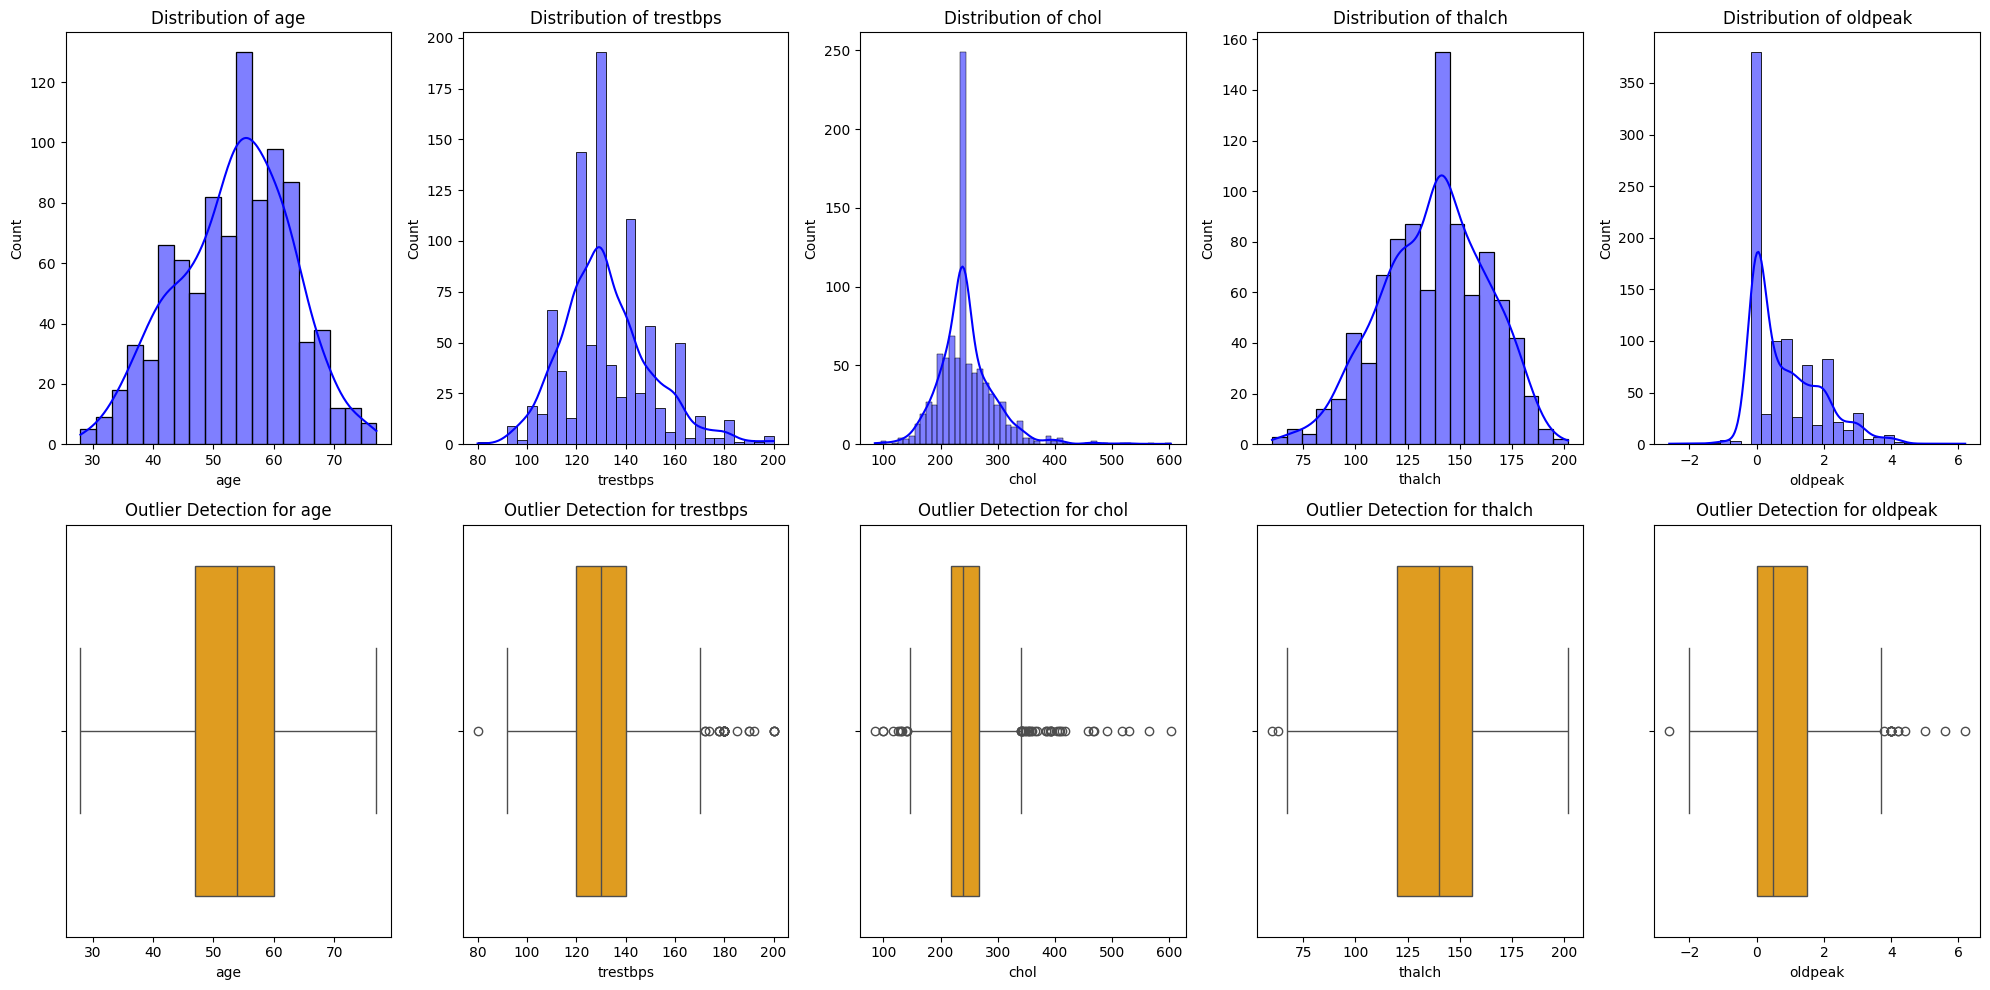

In [537]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Features - Distribution and Outlier Detection
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Create a grid of subplots (2 rows, 5 columns: one row for histograms, one for boxplots)
fig, axes = plt.subplots(2, len(numerical_features), figsize=(20, 10))

# Plot histograms for numerical features
for i, col in enumerate(numerical_features):
    sns.histplot(data=eda_dataframe, x=col, kde=True, ax=axes[0, i], color='blue')
    axes[0, i].set_title(f"Distribution of {col}")

# Plot boxplots for numerical features
for i, col in enumerate(numerical_features):
    sns.boxplot(data=eda_dataframe, x=col, ax=axes[1, i], color='orange')
    axes[1, i].set_title(f"Outlier Detection for {col}")

plt.tight_layout()
plt.show()

###### **Numerical Features (Histograms and Boxplots)**

##### **Age**
- **Distribution**: Age is roughly normally distributed, with a peak around 50–60 years.
- **Outliers**: No significant outliers detected.
- **Interpretation**: Most patients in the dataset are middle-aged or older, a demographic commonly at risk for heart disease.

##### **Resting Blood Pressure (`trestbps`)**
- **Distribution**: Concentrated around 120–140 mm Hg, with some values >180 mm Hg.
- **Outliers**: Few outliers on the lower and higher ends (e.g., <80 mm Hg or >180 mm Hg).
- **Interpretation**: Hypertension is evident in some cases, a common risk factor for heart disease.

##### **Serum Cholesterol (`chol`)**
- **Distribution**: Positively skewed, with most values between 200–300 mg/dl.
- **Outliers**: Some extremely high values (>400 mg/dl).
- **Interpretation**: Elevated cholesterol is prevalent, supporting its role in heart disease risk.

##### **Maximum Heart Rate Achieved (`thalch`)**
- **Distribution**: Peaks around 140–160 bpm.
- **Outliers**: Few outliers, especially on the lower end (<80 bpm).
- **Interpretation**: Reduced heart rate under stress might indicate cardiac issues in some patients.

##### **ST Depression (`oldpeak`)**
- **Distribution**: Skewed towards 0, with a long tail extending up to 6.
- **Outliers**: Several high values (>4), which indicate severe stress-induced heart issues.
- **Interpretation**: Most patients have mild or no ST depression, but extreme values are worth further investigation.

* **Categorical Features :**

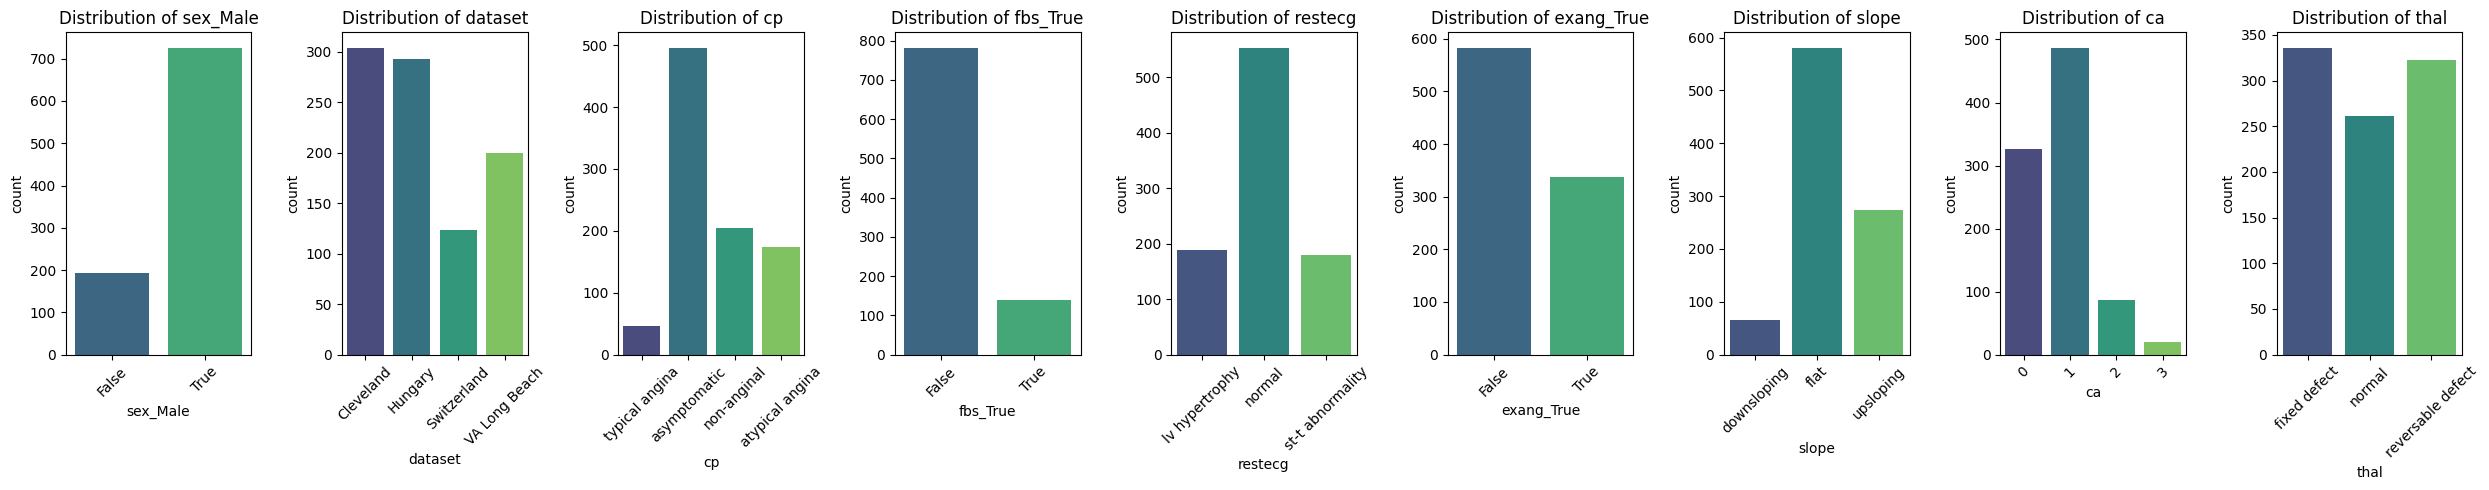

In [538]:
# Bar charts for categorical features with slanted x-axis labels
categorical_features = ['sex_Male', 'dataset', 'cp', 'fbs_True', 'restecg', 'exang_True', 'slope', 'ca', 'thal']
fig, axes = plt.subplots(1, len(categorical_features), figsize=(25, 5))

for i, col in enumerate(categorical_features):
    sns.countplot(data=eda_dataframe, x=col, hue=col, dodge=False, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)  #  to rotate x-axis labels

    if axes[i].legend_ is not None:  # Checking if the legend exists before trying to remove it
        axes[i].legend_.remove()

plt.tight_layout()
plt.show()

###### **Categorical Features (Bar Charts)**

1. **Resting ECG Results (`restecg`)**
- **Distribution**:
  - ~55% of patients have normal ECG results.
  - ~20% show left ventricular hypertrophy (LV hypertrophy).
  - ~25% exhibit ST-T abnormalities.
- **Interpretation**:
  - ST-T abnormalities (~ 25%) indicate ischemic changes, while LV hypertrophy (~ 20%) is often linked to chronic hypertension and cardiovascular stress.
  - Normal ECG results do not rule out heart disease, as ~45% of patients show abnormalities.

2. **ST Segment Slope (`slope`)**
  - **Distribution**: Flat slope is the most common, followed by upsloping and downsloping.
  - **Interpretation**: Flat or downsloping ST segments are often linked to ischemia or poor heart performance.

3. **Thalassemia Results (`thal`)**
  - **Distribution**: Most common category is "reversible defect," followed by "normal" and "fixed defect."
  - **Interpretation**: Reversible defects are indicative of treatable cardiac issues.

4. **Dataset Source**
  - **Distribution**: The dataset is well-distributed across Cleveland, Hungary, Switzerland, and VA Long Beach.
  - **Interpretation**: The dataset represents multiple regions, reducing bias in analysis.

##### Bivariate Analysis : Target Variable Analysis (num)
##### Analyzing how features vary with heart disease severity

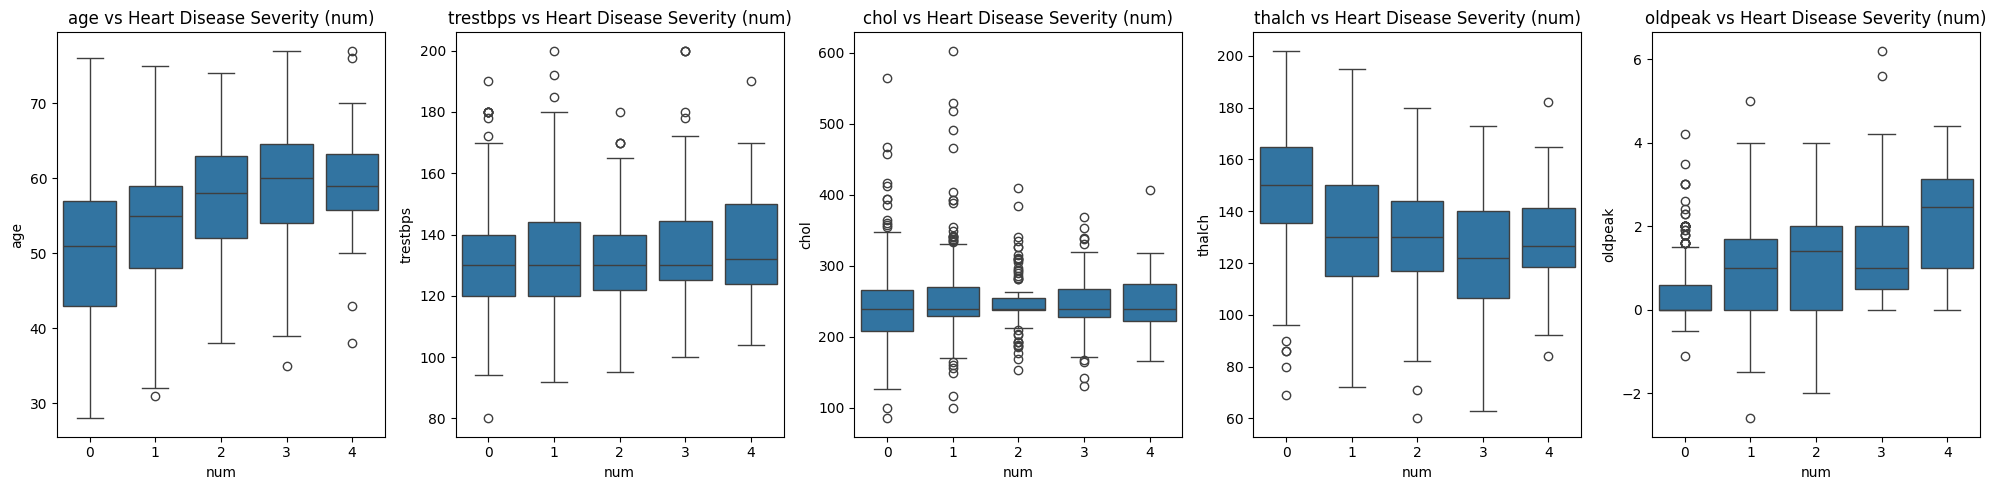

In [539]:
# Numerical Features (age, trestbps, chol, thalch, oldpeak) vs. num:
fig, axes = plt.subplots(1, len(numerical_features), figsize=(20, 5))

for i, col in enumerate(numerical_features):
    sns.boxplot(data=eda_dataframe, x='num', y=col, ax=axes[i])  # Removed 'palette'
    axes[i].set_title(f"{col} vs Heart Disease Severity (num)")

plt.tight_layout()
plt.show()


###### **Numerical Features vs. Heart Disease Severity (`num`)**

1. **Age vs. `num`**:
   - **Observation**: Older individuals tend to have more severe heart disease, with median age increasing as `num` rises.
   - **Interpretation**: Age is positively linked to heart disease severity. People above 50 are particularly at higher risk.

2. **Resting Blood Pressure (`trestbps`) vs. `num`**:
   - **Observation**: No clear trend in median values across `num`. Outliers exist at both high and low ends.
   - **Interpretation**: Resting blood pressure, by itself, might not strongly indicate heart disease severity.

3. **Serum Cholesterol (`chol`) vs. `num`**:
   - **Observation**: Patients with `num > 0` (indicating heart disease) show slightly higher cholesterol levels, though the range is wide.
   - **Interpretation**: High cholesterol increases the risk of heart disease but doesn’t correlate well with its severity in this data.

4. **Maximum Heart Rate Achieved (`thalch`) vs. `num`**:
   - **Observation**: Maximum heart rate decreases as `num` rises.
   - **Interpretation**: A lower heart rate during exercise suggests reduced cardiac function, common in severe heart disease.

5. **ST Depression (`oldpeak`) vs. `num`**:
   - **Observation**: Median `oldpeak` rises with increasing `num`. The range widens significantly for severe cases.
   - **Interpretation**: High `oldpeak` values indicate poor heart performance under stress, strongly linked to severe heart disease.

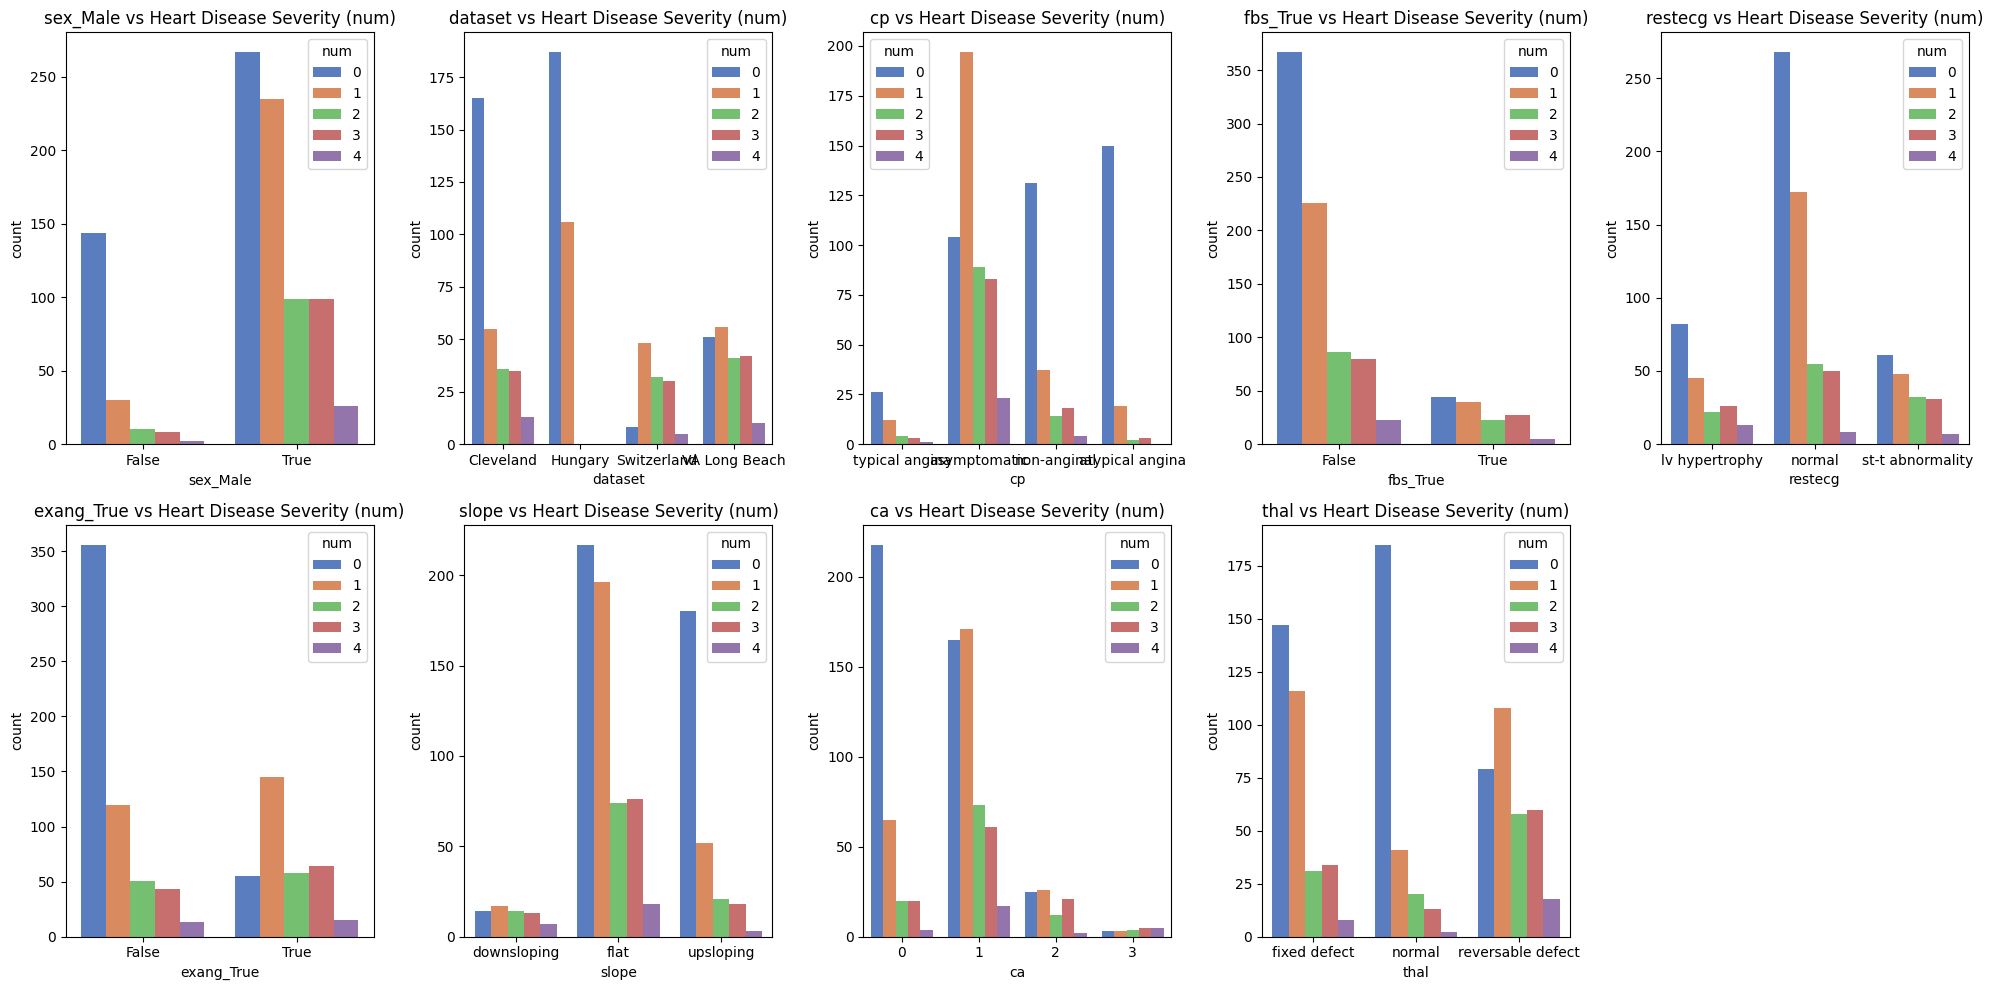

In [540]:
# Categorical Features (cp, restecg, slope, thal) vs. num:
# Below declaration is to print plots in rows and columns as required.
num_cols = 5  # We want 5 plots in the first row
num_rows = 2  # We want 2 rows in total

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Set the number of rows and columns

# Flattening axes to make it easier to index
axes = axes.flatten()

# Loop through categorical features and create count plots
for i, col in enumerate(categorical_features):
    if i < len(axes):  # We need to ensure there are enough axes for the features
        sns.countplot(data=eda_dataframe, x=col, hue='num', ax=axes[i], palette="muted")
        axes[i].set_title(f"{col} vs Heart Disease Severity (num)")

# This is to remove the empty last axis if any as we have only 9 categorical features.
if len(categorical_features) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

###### **Categorical Features vs. Heart Disease Severity (`num`)**

1. **Resting ECG Results (`restecg`) vs. `num`**:
   - **Observation**: Most patients with `num = 0` (no heart disease) have normal ECGs. Higher `num` values are associated with left ventricular hypertrophy.
   - **Interpretation**: ECG abnormalities, both hypertrophy and st-t abnormality, are more common in severe cases.

2. **ST Segment Slope (`slope`) vs. `num`**:
   - **Observation**: Patients with `num = 0` often have an upsloping ST segment, while those with `num > 0` typically show flat or downsloping segments.
   - **Interpretation**: A flat or downsloping ST segment indicates ischemia, strongly linked to heart disease severity.

3. **Thalassemia Results (`thal`) vs. `num`**:
   - **Observation**: Reversible defects dominate higher `num` categories, while normal results are frequent for `num = 0`.
   - **Interpretation**: Reversible defects are common in treatable cardiac issues but are more severe in heart disease cases.

4. **Dataset Source (`dataset`) vs. `num`**:
   - **Observation**: Patients from Hungary have more severe cases (`num > 0`), while Cleveland shows higher cases of `num = 0`.
   - **Interpretation**: Regional differences in heart disease severity or diagnostic criteria might be at play.

##### Multivariate Relationships :
* We are creating a heatmap to explore relationships between numerical features and the target (num) which is Correlation Analysis :


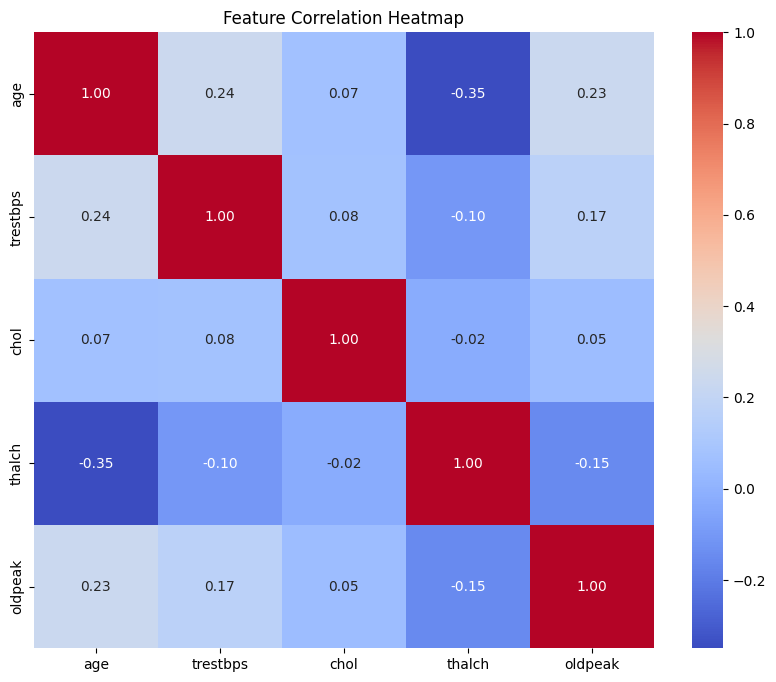

In [541]:
# .corr() function only works on numerical data,
# and the column dataset in our DataFrame contains string values such as 'Cleveland'.
# To fix this issue, you need to exclude non-numeric columns before computing the correlation matrix.
# Selecting only numerical columns which we have 5.
numerical_columns = eda_dataframe.select_dtypes(include=['number']).drop(columns=['id'])

# Computing the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

###### Relationship Between Numerical Features and Heart Disease Severity:

- **Age**: As people age, there seems to be a slight increase in the severity of heart disease. Older individuals tend to face more severe heart conditions, though the relationship is **weak positive correlation**.

- **Resting Blood Pressure (Trestbps)**: Trestbps shows a **weak positive correlation** with heart disease severity. This suggests that individuals with higher blood pressure are more likely to have severe cases of heart disease.

- **Cholesterol (Chol)**: Cholesterol shows **no significant correlation** with heart disease severity, meaning it doesn't appear to strongly influence the severity of heart disease based on the current dataset.

- **Max Heart Rate (Thalch)**: Thalch exhibits a **moderate negative correlation** with heart disease severity. This implies that individuals with more severe heart disease tend to have lower heart rates during stress tests.

- **ST Depression (Oldpeak)**: Oldpeak shows a **weak negative correlation** with heart disease severity. This suggests that lower ST depression values could be linked to higher or more severe cases of heart disease.

##### Multicollinearity Check

* We peform Multicollinearity Check to identify and handle redundant features that might bias clustering or dimensionality reduction.
* We use the Variance Inflation Factor (VIF), which quantifies how much a feature is correlated with other features.
* We select only numerical features from the dataset for multicollinearity analysis, as VIF is applicable only to numeric data.

In [542]:
from sklearn.preprocessing import StandardScaler
numerical_features = [
    'age', 'trestbps', 'chol', 'thalch', 'oldpeak'
]
# Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(eda_dataframe[numerical_features])

In [543]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features
vif_data["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(scaled_data.shape[1])]

print(vif_data)

    Feature       VIF
0       age  1.232858
1  trestbps  1.080265
2      chol  1.008963
3    thalch  1.145845
4   oldpeak  1.079877


* VIF < 5: Low multicollinearity (acceptable).
* 5 <= VIF <= 10: Moderate multicollinearity (consider dropping or transforming features).
* VIF > 10: High multicollinearity (drop or combine features).

###### **Analysis of Multicollinearity (VIF Results) for Numerical Features**

##### **Interpretation**
- The Variance Inflation Factor (VIF) values for all the features (`age`, `trestbps`, `chol`, `thalch`, `oldpeak`) are **well below 5**.
- This means there is **low multicollinearity** among the features, indicating that the variables contribute independently to the clustering model without redundant or overlapping information.
- All five numerical features are critical for clustering due to their low multicollinearity, distinct contributions, and medical relevance.

###### **Key Takeaway**
- The 5 numerical features are clean and well-structured for further analysis.
- We can proceed to the next steps without worrying about dropping or combining features due to multicollinearity.

In [544]:
from scipy.stats import chi2_contingency
import pandas as pd

# Select categorical columns
categorical_features = ['sex_Male', 'dataset', 'cp', 'fbs_True', 'restecg', 'exang_True', 'slope', 'ca', 'thal']

# Pairwise chi-square test
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        var1 = categorical_features[i]
        var2 = categorical_features[j]
        contingency_table = pd.crosstab(heart_data[var1], heart_data[var2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Test between {var1} and {var2}:")
        print(f"Chi-Square Statistic = {chi2}, p-value = {p}")
        print("-" * 50)

# Interpretation:
# If p-value < 0.05, the variables are statistically dependent.

Chi-Square Test between sex_Male and dataset:
Chi-Square Statistic = 80.69213954135833, p-value = 2.1805480976587935e-17
--------------------------------------------------
Chi-Square Test between sex_Male and cp:
Chi-Square Statistic = 37.85323922449902, p-value = 3.0360904586788346e-08
--------------------------------------------------
Chi-Square Test between sex_Male and fbs_True:
Chi-Square Statistic = 4.721519177663398, p-value = 0.029787415448737076
--------------------------------------------------
Chi-Square Test between sex_Male and restecg:
Chi-Square Statistic = 4.980586923106257, p-value = 0.08288563925735254
--------------------------------------------------
Chi-Square Test between sex_Male and exang_True:
Chi-Square Statistic = 21.37868636830045, p-value = 3.7693828990926266e-06
--------------------------------------------------
Chi-Square Test between sex_Male and slope:
Chi-Square Statistic = 20.19908385118492, p-value = 4.109837702878667e-05
----------------------------

###### **Feature Relationships and Statistical Significance**

* A **p-value < 0.05** indicates significant dependence between the categorical variables.

* From the above Chi-Square values derived, below are the strong relations observed between categorical variables.

#### Sex
- **With dataset (p-value ≈ 0)**: Indicates differences in gender distribution across locations.
- **With cp (p-value ≈ 0)**: Shows chest pain type varies significantly by gender.
- **With exang (p-value ≈ 0)**: Suggests exercise-induced angina has a gender-based pattern.
- **With slope (p-value ≈ 0.002)**: ST slope varies based on gender.
- **With ca (p-value ≈ 0.0007)**: Number of vessels affected differs across genders.
- **With thal (p-value ≈ 0)**: Thalassemia types are gender-influenced.

##### Chest Pain Type (cp)
- **With exang (p-value ≈ 0)**: Exercise-induced angina relates to chest pain type.
- **With slope (p-value ≈ 0)**: ST slope differs significantly by chest pain type.
- **With ca (p-value ≈ 0)**: Number of vessels affected is associated with chest pain type.
- **With thal (p-value ≈ 0)**: Thalassemia types vary by chest pain type.

##### Fasting Blood Sugar (fbs)
- **With ca (p-value ≈ 0.024)**: Number of affected vessels is linked to fasting blood sugar levels.

##### Resting ECG Results (restecg)
- **With slope (p-value ≈ 0.012)**: ECG abnormalities align with ST slope.
- **With ca (p-value ≈ 0)**: Number of affected vessels varies by ECG results.
- **With thal (p-value ≈ 0)**: Thalassemia types are related to ECG findings.

##### Exercise-Induced Angina (exang)
- **With slope (p-value ≈ 0)**: ST slope varies significantly by exercise-induced angina.
- **With ca (p-value ≈ 0)**: Number of affected vessels is linked to exercise-induced angina.
- **With thal (p-value ≈ 0)**: Thalassemia types differ based on exercise-induced angina.

##### ST Segment Slope (slope)
- **With ca (p-value ≈ 0)**: Number of affected vessels depends on ST slope.
- **With thal (p-value ≈ 0)**: Thalassemia types vary by ST slope.

##### Number of Affected Vessels (ca)
- **With thal (p-value ≈ 0)**: Thalassemia types align with the number of affected vessels.


##### **Key Takeaway**
- We can create composite features like :
  - (Chest pain type + Exercise-induced angina)
  - (ECG results + Thalassemia type)
  - (ST slope + Number of vessels affected)
- We can use relationships between sex, cp, exang, slope, and ca to generate clusters or assess patterns.



##### **Points from both Numerical & Categorical Multicollinearity Analysis :**
* As VIF analysis shows low multicollinearity for numerical features, Combining categorical features (e.g., thal, slope) with numerical features helps represent interdependencies while maintaining their distinct contributions.
* Health conditions often depend on a combination of categorical and numerical data.
  * Example: High chol levels combined with cp = typical angina indicate a specific risk group.

### **Section - 5 : Initial PCA & Clustering on Original Features**

* In this section, we analyze feature scaling and variance to prepare the data for clustering. Dimensionality reduction using PCA is performed to simplify the dataset while retaining key information. Finally, PCA visualizations are created to assess cluster separability and feature contributions in lower dimensions.








##### Analyzing Feature Scaling and Variance.


* Confirmation whether features need scaling before clustering.
* Use the variance of numerical features to ensure no single feature dominates due to its scale.
* Purpose : Clustering algorithms like K-Means are distance-based and sensitive to scale. Features like oldpeak and ca might have different scales.

In [545]:
# Import necessary libraries
import numpy as np  # For numerical operations and array manipulations
import pandas as pd  # For handling data in DataFrame format
from sklearn.preprocessing import StandardScaler  # To standardize numerical features

# Variance of numerical features
numerical_variance = eda_dataframe[numerical_features].var()
print("Variance of Numerical Features:")
print(numerical_variance)

Variance of Numerical Features:
age           88.824691
trestbps     321.476326
chol        2681.720153
thalch       632.282858
oldpeak        1.119467
dtype: float64


* Algorithms that are distance-based can become biased towards features with larger variances or scales.
* Therefore we performed scaling which ensures that each feature contributes equally to the clustering process, irrespective of its variance or original scale.

In [546]:
# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(eda_dataframe[numerical_features])

In [547]:
from sklearn.preprocessing import LabelEncoder  # To encode categorical features into numeric format

# Encoding categorical features
encoder = LabelEncoder()
encoded_categorical_features = eda_dataframe[categorical_features].apply(lambda col: encoder.fit_transform(col))

In [548]:
# Combine scaled numerical and encoded categorical features
# Here Horizontal stack ensures numerical and categorical features are joined correctly
preprocessed_data = np.hstack([scaled_data, encoded_categorical_features.values])

# Creating a new dataframe for preprocessed data
preprocessed_dataframe = pd.DataFrame(
    preprocessed_data,
    columns=numerical_features + categorical_features
)

# Display preprocessed dataframe
print("Preprocessed Data:")
print(preprocessed_dataframe.head())

Preprocessed Data:
        age  trestbps      chol    thalch   oldpeak  sex_Male  dataset   cp  \
0  1.007386  0.717803 -0.236157  0.489727  1.368109       1.0      0.0  3.0   
1  1.432034  1.554856  0.787855 -1.181478  0.611589       1.0      0.0  0.0   
2  1.432034 -0.677285 -0.313441 -0.345875  1.651804       1.0      0.0  0.0   
3 -1.752828 -0.119250  0.092300  1.961979  2.502889       1.0      0.0  2.0   
4 -1.328180 -0.119250 -0.796466  1.365120  0.517024       0.0      0.0  1.0   

   fbs_True  restecg  exang_True  slope   ca  thal  
0       1.0      0.0         0.0    0.0  0.0   0.0  
1       0.0      0.0         1.0    1.0  3.0   1.0  
2       0.0      0.0         1.0    1.0  2.0   2.0  
3       0.0      1.0         0.0    0.0  0.0   1.0  
4       0.0      0.0         0.0    2.0  0.0   1.0  


##### Dimensionality Reduction for Visual Assessment.


* Even though dimensionality reduction is optional, applying PCA can help visualize data in reduced dimensions, revealing whether clusters might naturally exist.

  Purpose:

* Reduce dimensions for visual inspection of potential groupings.
* Identify variance explained by components to confirm the importance of features.

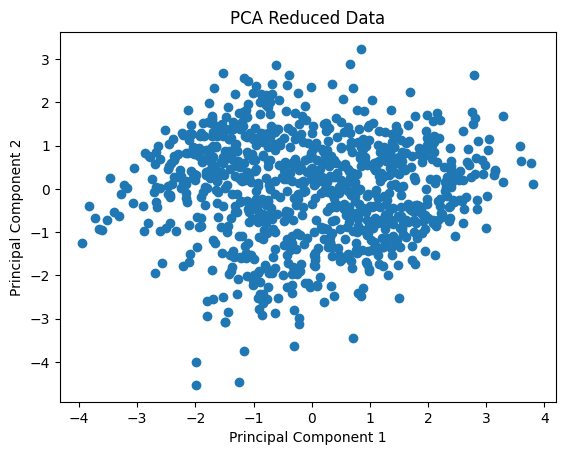

In [549]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_data = pca.fit_transform(preprocessed_data)


plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title("PCA Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

* This plot is purely based on the reduced dimensions and does not provide any additional information about clusters or target variables.
* Let's compare the reduced data with the num variable.

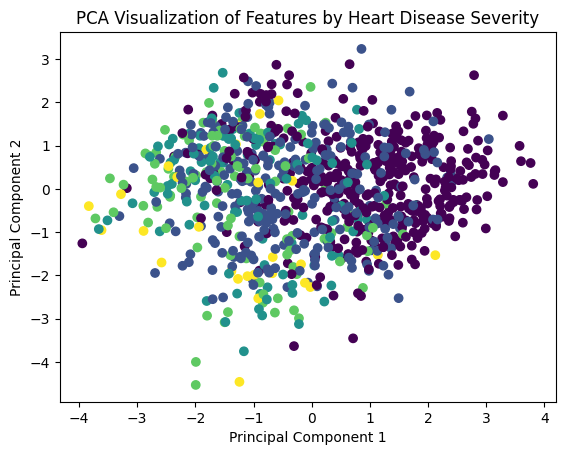

In [550]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# pca = PCA(n_components=2)
# reduced_data = pca.fit_transform(preprocessed_data)

# Scatter plot of PCA-reduced dimensions
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=eda_dataframe['num'], cmap='viridis')
plt.title("PCA Visualization of Features by Heart Disease Severity")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

##### **PCA Visualization**
- The PCA plot shows that the data does not naturally form well-separated groups in the reduced dimensional space.
- While `num = 0` (no heart disease) has some distinct patterns, higher severity levels (`num = 2, 3, 4`) significantly overlap.
- **Takeaway**: Additional feature engineering or advanced dimensionality reduction methods like t-SNE might help improve separability.

In [551]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clustering on preprocessed_data
kmeans_full = KMeans(n_clusters=4, random_state=42)
cluster_labels_full = kmeans_full.fit_predict(preprocessed_data)

# Evaluate using Silhouette Score
silhouette_full = silhouette_score(preprocessed_data, cluster_labels_full)
print(f"Silhouette Score (Preprocessed Data): {silhouette_full}")
# For consistent and reliable results, it is a good practice to always specify a random_state.
# Clustering on reduced_data
kmeans_pca = KMeans(n_clusters=4, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(reduced_data)

# Evaluate using Silhouette Score
silhouette_pca = silhouette_score(reduced_data, cluster_labels_pca)
print(f"Silhouette Score (PCA Reduced Data): {silhouette_pca}")


Silhouette Score (Preprocessed Data): 0.12140887934451661
Silhouette Score (PCA Reduced Data): 0.35266768671480225




* Low Score on Preprocessed Data (0.1214):
  * Clusters in the original data lack clear separation, indicating overlapping or noisy features.
* Improved Score on PCA Data (0.3526):
  * PCA has reduced noise and highlighted key patterns, making clusters more defined.
* A good Silhouette Score is closer to 1, which indicates well-separated and distinct clusters with clear boundaries.
* Further :
  * We can try different clustering methods like DBSCAN or GMM.
  * Explore new features, and Ensure clusters are meaningful by validating with domain knowledge and scatter plots.



### **Section - 6 : Feature Engineering**

Feature engineering is a crucial step in improving the prediction of heart disease. Below are the key steps  to engineer features effectively. Feature engineering helps in improving the model's predictive power by creating new features or transforming existing ones.
New features might be based on existing ones, and creating them before scaling or encoding ensures that the transformations we apply are based on the actual data relationships.


Steps:
* Binning (Discretization)
Some continuous features can be discretized into categories, making them easier to work with.
Example: Age could be divided into bins like "Young", "Middle-aged", and "Old".

* Normalization / Scaling
Ensure that features like trestbps, chol, thalch, and oldpeak are scaled, especially if you're going to use machine learning algorithms.

* Interaction Features
Create new features by combining existing feature

* Encoding Categorical Variables
Since you have categorical features like restecg, slope, thal, and sex, you can use encoding methods:
One-hot encoding for nominal variables (e.g., restecg, slope, thal)
Label encoding for ordinal variables (e.g., sex can be encoded as 0 and 1).

* Creating Derived Variables
You can create derived variables such as the BMI (Body Mass Index) if there are height and weight columns (if not already present).


In [552]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          920 non-null    int64   
 1   age         920 non-null    int64   
 2   dataset     920 non-null    object  
 3   cp          920 non-null    object  
 4   trestbps    920 non-null    float64 
 5   chol        920 non-null    float64 
 6   restecg     920 non-null    object  
 7   thalch      920 non-null    float64 
 8   oldpeak     920 non-null    float64 
 9   slope       920 non-null    object  
 10  ca          920 non-null    category
 11  thal        920 non-null    object  
 12  num         920 non-null    category
 13  sex_Male    920 non-null    bool    
 14  fbs_True    920 non-null    bool    
 15  exang_True  920 non-null    bool    
dtypes: bool(3), category(2), float64(4), int64(2), object(5)
memory usage: 84.1+ KB


In [553]:
heart_dataset=heart_data.copy()

In [554]:
print(heart_dataset.columns)

Index(['id', 'age', 'dataset', 'cp', 'trestbps', 'chol', 'restecg', 'thalch',
       'oldpeak', 'slope', 'ca', 'thal', 'num', 'sex_Male', 'fbs_True',
       'exang_True'],
      dtype='object')


#### Feature Engineering: New Features Created

##### 1. `oldpeak_per_thalch`: Ratio of ST Depression to Maximum Heart Rate
- **Purpose**: Highlights cases where stress levels (`oldpeak`) are disproportionately high compared to heart rate performance (`thalch`).
- **Importance**:
  - High values indicate poor heart performance under stress, a strong marker for cardiac issues.
  - Low values suggest better heart rate response to stress.

##### 2. `age_blood_pressure_ratio`: Ratio of Age to Resting Blood Pressure
- **Purpose**: Explores how age influences blood pressure.
- **Importance**:
  - Helps detect age-adjusted blood pressure abnormalities.
  - Identifies risks for older individuals with high blood pressure.

##### 3. `chol_blood_pressure_ratio`: Ratio of Cholesterol to Resting Blood Pressure
- **Purpose**: Captures the interaction between cholesterol and blood pressure, two key heart disease risk factors.
- **Importance**:
  - High ratios may indicate cholesterol imbalance impacting cardiovascular health.

##### 4. `oldpeak_age_ratio`: Ratio of ST Depression to Age
- **Purpose**: Examines how stress-induced ST depression varies with age.
- **Importance**:
  - Identifies age-related cardiac vulnerabilities.
  - Highlights older individuals experiencing severe stress-induced depression.

##### 5. `bp_category`: Categorical Classification of Blood Pressure
- **Purpose**: Categorizes resting blood pressure into `low`, `normal`, and `high`.
- **Importance**:
  - Simplifies the analysis of blood pressure trends.
  - Enables better clustering and visualization of blood pressure impact.

##### 6. `exang_cp_interaction`: Interaction of Exercise-Induced Angina and Chest Pain Type
- **Purpose**: Combines the effects of exercise-induced angina (`exang`) and chest pain type (`cp`).
- **Importance**:
  - Provides insights into how stress-induced angina and chest pain influence cardiac risk.

##### 7. `thalch_per_age`: Ratio of Maximum Heart Rate to Age
- **Purpose**: Represents age-adjusted cardiac performance.
- **Importance**:
  - Low ratios indicate poor cardiac performance for the given age.
  - Useful for detecting age-related risks in cardiac function.

##### 8. `bp_per_ca`: Ratio of Resting Blood Pressure to Number of Blocked Vessels
- **Purpose**: Analyzes the relationship between blood pressure and the extent of vessel blockages (`ca`).
- **Importance**:
  - High ratios in patients with severe blockages suggest significant cardiovascular strain.



In [555]:
import pandas as pd

# Create engineered features
heart_dataset['oldpeak_per_thalch'] = heart_dataset['oldpeak'] / (heart_dataset['thalch'] + 1e-5)
# Age and Blood Pressure Ratio
heart_dataset['age_blood_pressure_ratio'] = heart_dataset['age'] / heart_dataset['trestbps']
# Cholesterol to Blood Pressure Ratio
heart_dataset['chol_blood_pressure_ratio'] = heart_dataset['chol'] / heart_dataset['trestbps']
# Old Peak to Age Ratio
heart_dataset['oldpeak_age_ratio'] = heart_dataset['oldpeak'] / heart_dataset['age']
# Blood Pressure Categories (low, normal, high)
heart_dataset['bp_category'] = pd.cut(
    heart_dataset['trestbps'],
    bins=[0, 120, 140, float('inf')],
    labels=['low', 'normal', 'high']
)
# Interaction of Exercise Induced Angina and Chest Pain Type
heart_dataset['exang_cp_interaction'] = heart_dataset['exang_True'] * heart_dataset['cp'].map({
    'typical angina': 1,
    'atypical angina': 2,
    'non-anginal': 3,
    'asymptomatic': 4
})
heart_dataset['thalch_per_age'] = heart_dataset['thalch'] / heart_dataset['age']

# Convert 'ca' to numeric using cat.codes for calculations
heart_dataset['ca_numeric'] = heart_dataset['ca'].cat.codes

heart_dataset['bp_per_ca'] = heart_dataset['trestbps'] / (heart_dataset['ca_numeric'] + 1)

print(heart_dataset.head())

   id  age    dataset               cp  trestbps   chol         restecg  \
0   1   63  Cleveland   typical angina     145.0  233.0  lv hypertrophy   
1   2   67  Cleveland     asymptomatic     160.0  286.0  lv hypertrophy   
2   3   67  Cleveland     asymptomatic     120.0  229.0  lv hypertrophy   
3   4   37  Cleveland      non-anginal     130.0  250.0          normal   
4   5   41  Cleveland  atypical angina     130.0  204.0  lv hypertrophy   

   thalch  oldpeak        slope  ... exang_True oldpeak_per_thalch  \
0   150.0      2.3  downsloping  ...      False           0.015333   
1   108.0      1.5         flat  ...       True           0.013889   
2   129.0      2.6         flat  ...       True           0.020155   
3   187.0      3.5  downsloping  ...      False           0.018717   
4   172.0      1.4    upsloping  ...      False           0.008140   

  age_blood_pressure_ratio  chol_blood_pressure_ratio  oldpeak_age_ratio  \
0                 0.434483                   1.60689

In [556]:
# Calculate missing values count and percentage
missing_count = heart_dataset.isnull().sum()
missing_percentage = (missing_count / len(heart_dataset)) * 100

# Display missing values and their percentage
print("Missing Values (Count and Percentage):")
missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})
print(missing_data)
# Copying separate dataset for association rules
heart_dataset_association=heart_dataset.copy()

Missing Values (Count and Percentage):
                           Missing Count  Missing Percentage
id                                     0                 0.0
age                                    0                 0.0
dataset                                0                 0.0
cp                                     0                 0.0
trestbps                               0                 0.0
chol                                   0                 0.0
restecg                                0                 0.0
thalch                                 0                 0.0
oldpeak                                0                 0.0
slope                                  0                 0.0
ca                                     0                 0.0
thal                                   0                 0.0
num                                    0                 0.0
sex_Male                               0                 0.0
fbs_True                               0      

### **Section - 7 : Association Rules**

This section performs association rule mining using the Apriori algorithm to uncover interesting relationships between categorical attributes in the given dataset (heart_dataset).

Beyond encoding and scaling, there is further encofing called the OHE is implemented to changethe variable values to binary column. This process turns the data into a format suitable for association rule mining.
The encoded data is then converted to boolean (True/False) type, representing whether the presence or absence of a category.

**Finding Frequent Itemsets**
The Apriori algorithm is used to find frequent itemsets in the dataset with a minimum support threshold of 5%. This means itemsets that occur in at least 5% of the transactions (or rows) are considered frequent.

**Generating Association Rules:**

* Association rules are generated from the frequent itemsets. A rule has the form "IF antecedent THEN consequent" ( a pattern), where the antecedent and consequent are itemsets (e.g., if a person has a certain condition, then they are likely to have another condition).
* The code uses the lift metric with a minimum threshold of 1, meaning only rules with a lift greater than 1 are considered. A lift greater than 1 indicates that the rule has a stronger relationship than random chance.

**Definitions for Interpretation :**
* Antecedents: The items that are present in the "IF" part of the rule.
* Consequents: The items that are present in the "THEN" part of the rule.
* Antecedent support: The proportion of transactions that contain the antecedent.
* Consequent support: The proportion of transactions that contain the consequent.
* Support: The proportion of transactions that contain both the antecedent and consequent. This is the probability of both occurring together.
* Confidence: The probability that the consequent is true given that the antecedent is true. It is the ratio of transactions that contain both the antecedent and consequent to the transactions that contain the antecedent.
* Lift: The ratio of the observed support to the expected support if the antecedent and consequent were independent. A lift greater than 1 indicates a strong positive relationship, while a value less than 1 suggests a negative relationship.
* Representativity: A measure of the representativeness of the rule, typically a value between 0 and 1.
* Leverage: The difference between the observed support and the expected support if the antecedent and consequent were independent.
* Conviction: A metric that reflects how much more likely the consequent is to occur given the antecedent, taking into account the probability that the consequent does not occur when the antecedent is true.
* Zhang’s Metric: A measure related to the strength of the association rule.
* Jaccard: A similarity metric that measures the ratio of intersection over union of the antecedent and consequent.
* Certainty: A measure of certainty that indicates the likelihood of a rule’s truthfulness.
* Kulczynski: A metric that quantifies the probability that either the antecedent or consequent occurs given the other.

In [557]:
import warnings
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Suppress specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Define categorical columns for association rules
categorical_columns = ['cp', 'restecg', 'slope', 'thal']

# One-hot encode categorical columns
heart_encoded = pd.get_dummies(heart_dataset_association[categorical_columns])

# Convert to boolean (True for 1, False for 0)
heart_encoded = heart_encoded.astype(bool)

# Use apriori to find frequent itemsets
frequent_itemsets = apriori(heart_encoded, min_support=0.05, use_colnames=True)

# Generate association rules from frequent itemsets if available
if not frequent_itemsets.empty:
    num_itemsets = len(frequent_itemsets)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=num_itemsets)

    # Drop NaN values in rule metrics
    rules = rules.dropna(subset=['lift', 'confidence', 'support'])
    rules = rules[rules['lift'] > 1]  # Keep rules with lift > 1

    # Print top 10 rules with clear section header
    print("\n" + "="*40)
    print("Top 10 Association Rules:")
    print("="*40)
    print(rules.head(10))

    # Initialize support, confidence, and lift in the original dataset as float columns
    heart_dataset_association['support'] = 0.0
    heart_dataset_association['confidence'] = 0.0
    heart_dataset_association['lift'] = 0.0

    # Map association rule metrics back to the original dataset
    for _, rule in rules.iterrows():
        # Extract antecedents as a set of conditions
        conditions = list(rule['antecedents'])  # Convert frozenset to a list of column names

        # Match rows in the encoded dataset
        matching_rows = heart_encoded[conditions].all(axis=1)

        # Assign rule metrics to matching rows in the dataset
        heart_dataset_association.loc[matching_rows, 'support'] = rule['support']
        heart_dataset_association.loc[matching_rows, 'confidence'] = rule['confidence']
        heart_dataset_association.loc[matching_rows, 'lift'] = rule['lift']

    # Prepare data for clustering
    clustering_data = heart_dataset_association.copy()

    # Drop irrelevant columns like 'id'
    if 'id' in clustering_data.columns:
        clustering_data = clustering_data.drop(columns=['id'])

    # Normalize numerical features
    scaler = StandardScaler()
    clustering_data_scaled = scaler.fit_transform(clustering_data.select_dtypes(include=['float64', 'int64']))

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

    # Evaluate clustering performance
    print("\n" + "="*40)
    print("Silhouette Score:")
    print("="*40)
    silhouette_avg = silhouette_score(clustering_data_scaled, clustering_data['Cluster'])
    print(f"{silhouette_avg}")


    # Analyze clusters
    print("\n" + "="*40)
    print("Cluster Analysis:")
    print("="*40)
    # Exclude non-numeric columns for mean calculation
    numeric_columns = clustering_data.select_dtypes(include=['float64', 'int64']).columns
    print(clustering_data.groupby('Cluster')[numeric_columns].mean())

else:
    print("No frequent itemsets found with the given support threshold.")



Top 10 Association Rules:
                  antecedents                 consequents  antecedent support  \
0           (cp_asymptomatic)    (restecg_lv hypertrophy)            0.539130   
1    (restecg_lv hypertrophy)           (cp_asymptomatic)            0.204348   
2           (cp_asymptomatic)  (restecg_st-t abnormality)            0.539130   
3  (restecg_st-t abnormality)           (cp_asymptomatic)            0.194565   
4           (cp_asymptomatic)         (slope_downsloping)            0.539130   
5         (slope_downsloping)           (cp_asymptomatic)            0.070652   
6           (cp_asymptomatic)                (slope_flat)            0.539130   
7                (slope_flat)           (cp_asymptomatic)            0.631522   
8           (cp_asymptomatic)         (thal_fixed defect)            0.539130   
9         (thal_fixed defect)           (cp_asymptomatic)            0.365217   

   consequent support   support  confidence      lift  representativity  \
0     

#### Interpretation of Association Rules Output

The generated association rules highlight relationships between categorical heart health indicators, providing actionable insights for decision-making.

##### Key Metrics:
1. **Antecedents**: The "IF" part of the rule (e.g., `restecg_lv hypertrophy`).
2. **Consequents**: The "THEN" part of the rule (e.g., `cp_asymptomatic`).
3. **Support**: The joint probability of both antecedent and consequent occurring together (e.g., `restecg_lv hypertrophy` and `cp_asymptomatic` appear together in 11.09% of cases).
4. **Confidence**: The probability of the consequent occurring given the antecedent (e.g., confidence of 54.25% for `restecg_lv hypertrophy` → `cp_asymptomatic`).
5. **Lift**: A measure of the strength of the association. A lift > 1 indicates a meaningful relationship (e.g., `slope_downsloping` → `cp_asymptomatic` has a lift of 1.37).

---

##### Observations:
1. **Strong Relationships**:
   - `slope_downsloping` → `cp_asymptomatic` has a confidence of 73.85% and lift of 1.37, showing a strong association.
   - `restecg_st-t abnormality` → `cp_asymptomatic` has a confidence of 61.45% and lift of 1.14.

2. **Significance of `cp_asymptomatic`**:
   - `cp_asymptomatic` frequently appears as a consequent, highlighting its prevalence and association with other heart health indicators.

3. **Low Support but High Confidence**:
   - Rules like `slope_downsloping` → `cp_asymptomatic` occur in fewer cases (5.21% support) but exhibit strong confidence, indicating their significance.

---

##### **Clustering results with Association Rules** :

* The **Silhouette Score of 0.1248** indicates that the clusters formed, even after incorporating association rule metrics (support, confidence, and lift), are not well-separated and show significant overlap. This suggests that while association rules provided additional insights, they were not sufficient to create distinct clusters in the current setup.
* Implications :
  * Cluster Quality: The low Silhouette Score reflects that the current feature set, including the association rule metrics, does not adequately capture the inherent structure of the data.
  * Next Steps: To enhance clustering performance, further feature engineering will be undertaken. This will involve creating new, domain-relevant features that can better represent the relationships and patterns within the data, possibly in combination with more features.
* Incorporating association rules was a valuable step, but further refinement is needed to improve the clustering results and overall interpretability.

---

##### Conclusion:
The association rules reveal meaningful relationships between heart health indicators. Strong rules, such as `slope_downsloping` → `cp_asymptomatic`, suggest the need for targeted interventions for asymptomatic individuals with specific ECG characteristics. These insights provide a data-driven foundation for heart health recommendations and prioritization.


### **Section - 8 : Clustering**

* This section focuses on grouping similar data points using clustering techniques. We begin by checking for minimal multicollinearity among selected features and preprocessing the data for clustering. Clusters are validated and refined, with t-SNE used for visualization. Multiple algorithms K-means, Hierarchical Clustering, DBSCAN, and GMM are applied to identify distinct clusters and evaluate their performance.

In [558]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         920 non-null    int64   
 1   age                        920 non-null    int64   
 2   dataset                    920 non-null    object  
 3   cp                         920 non-null    object  
 4   trestbps                   920 non-null    float64 
 5   chol                       920 non-null    float64 
 6   restecg                    920 non-null    object  
 7   thalch                     920 non-null    float64 
 8   oldpeak                    920 non-null    float64 
 9   slope                      920 non-null    object  
 10  ca                         920 non-null    category
 11  thal                       920 non-null    object  
 12  num                        920 non-null    category
 13  sex_Male                   920 non-

* Correlation Check : We need to ensure that the selected features have minimal multicollinearity.


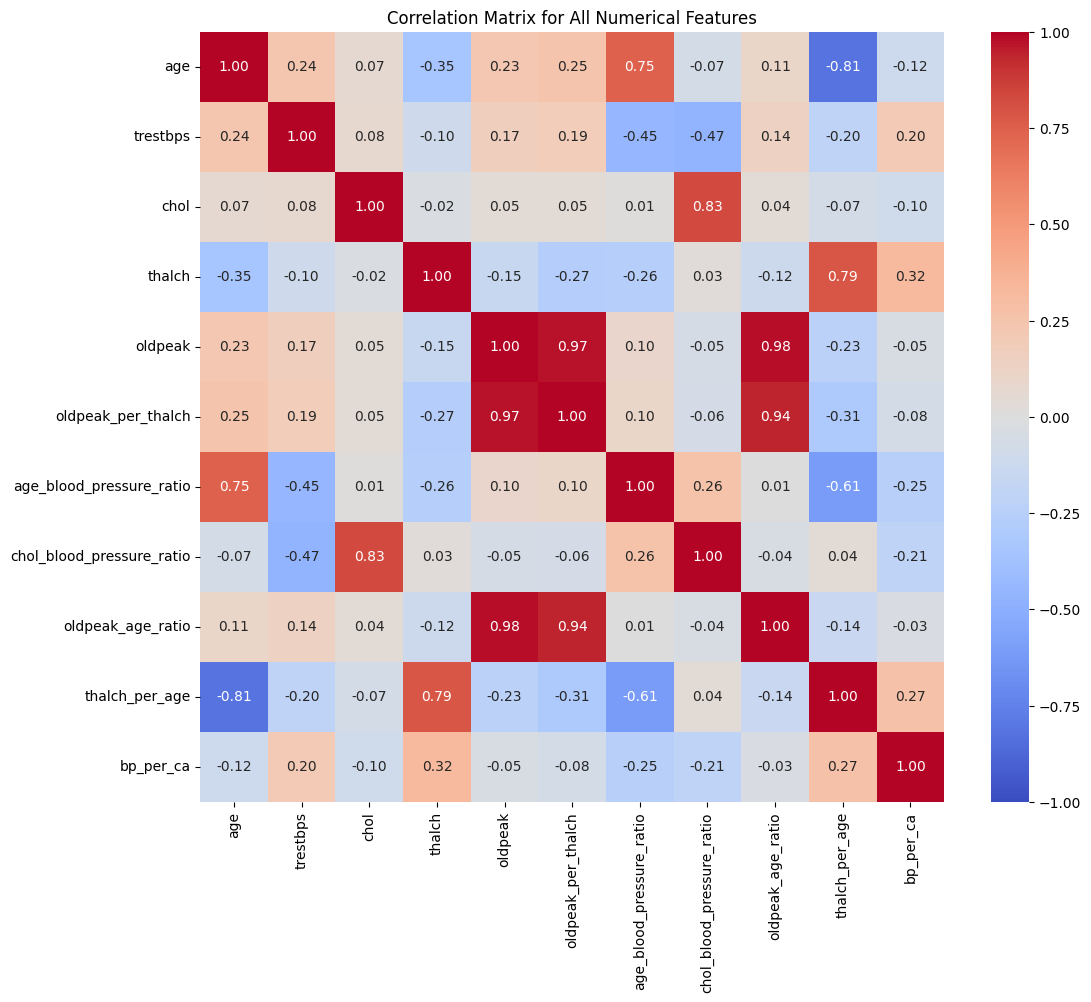

In [559]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine old and new numerical features
numerical_features = [
    'age', 'trestbps', 'chol', 'thalch', 'oldpeak',  # Original numerical features
    'oldpeak_per_thalch', 'age_blood_pressure_ratio', 'chol_blood_pressure_ratio',
    'oldpeak_age_ratio', 'thalch_per_age', 'bp_per_ca'  # Engineered numerical features
]

# Extract the numerical data
numerical_data = heart_dataset[numerical_features]

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for All Numerical Features")
plt.show()

#### Interpretation of the Correlation Matrix

##### 1. Highly Correlated Features:
- **`oldpeak` and `oldpeak_per_thalch` (0.97):**
  These features are strongly correlated, indicating redundancy. Including both might introduce multicollinearity.
- **`oldpeak` and `oldpeak_age_ratio` (0.98):**
  These features capture similar information, suggesting one of them can be removed.
- **`chol` and `chol_blood_pressure_ratio` (0.83):**
  The strong correlation indicates overlap in the information provided by these features.

##### 2. Moderately Correlated Features:
- **`thalch_per_age` and `thalch` (0.79):**
  This shows that `thalch_per_age` effectively captures an age-adjusted perspective of maximum heart rate.

##### 3. Weakly Correlated Features:
- **`bp_per_ca` and most other features:**
  This feature provides unique information about the relationship between blood pressure and the number of blocked vessels, making it valuable for clustering.

##### 4. Age-Related Correlations:
- **`age` and `age_blood_pressure_ratio` (0.75):**
  This ratio effectively captures how age interacts with blood pressure.
- **`age` and `thalch_per_age` (-0.81):**
  Indicates that older individuals tend to have lower maximum heart rates, as expected.



##### Preprocessing for Clustering
* we should focus on scaling numerical features that are continuous and relevant for clustering.
* Excluding categorical and boolean features from scaling as their values don’t represent magnitudes.

In [560]:
from sklearn.preprocessing import StandardScaler

# Features for scaling
features_to_scale = [
    'trestbps', 'chol', 'thalch', 'oldpeak',
    'age_blood_pressure_ratio', 'chol_blood_pressure_ratio',
    'thalch_per_age', 'bp_per_ca'
]

# Initialize the scaler
scaler = StandardScaler()

# Scale only the selected features
scaled_data = scaler.fit_transform(heart_dataset[features_to_scale])

# Convert the scaled data back to a DataFrame
scaled_df_clustering = pd.DataFrame(scaled_data, columns=features_to_scale)

print(scaled_df_clustering.describe())

           trestbps          chol        thalch       oldpeak  \
count  9.200000e+02  9.200000e+02  9.200000e+02  9.200000e+02   
mean  -3.552714e-16 -1.660507e-16 -4.016111e-16 -2.316987e-17   
std    1.000544e+00  1.000544e+00  1.000544e+00  1.000544e+00   
min   -2.909426e+00 -3.095664e+00 -3.091427e+00 -3.265577e+00   
25%   -6.772850e-01 -5.308023e-01 -7.039908e-01 -8.068863e-01   
50%   -1.192497e-01 -1.105707e-01  9.182113e-02 -3.340612e-01   
75%    4.387856e-01  4.207566e-01  7.284707e-01  6.115890e-01   
max    3.786997e+00  6.912610e+00  2.558838e+00  5.056145e+00   

       age_blood_pressure_ratio  chol_blood_pressure_ratio  thalch_per_age  \
count              9.200000e+02               9.200000e+02    9.200000e+02   
mean               2.162521e-16              -6.564797e-17   -3.089316e-17   
std                1.000544e+00               1.000544e+00    1.000544e+00   
min               -2.899589e+00              -2.602444e+00   -1.905803e+00   
25%               -7.159

In [561]:
# Define the mappings for ordinal encoding
ordinal_mappings = {
    'cp': {'non-anginal': 0, 'atypical angina': 1, 'typical angina': 2, 'asymptomatic': 3},
    'slope': {'upsloping': 0, 'flat': 1, 'downsloping': 2},
    'thal': {'normal': 0, 'fixed defect': 1, 'reversable defect': 2},
    'restecg': {'normal': 0, 'st-t abnormality': 1, 'lv hypertrophy': 2}
}

heart_data['thal'] = heart_data['thal'].str.strip().str.lower()


# Apply the mappings to the dataset
for feature, mapping in ordinal_mappings.items():
    heart_dataset[feature] = heart_dataset[feature].map(mapping)

# Verify the transformation
print(heart_dataset[['cp', 'slope', 'thal', 'restecg']].head())


# Combine the scaled numerical data and ordinal-encoded categorical features
clustering_data = pd.concat([
    scaled_df_clustering,  # Scaled numerical features
    heart_dataset[['cp', 'slope', 'thal', 'restecg']]  # Ordinal encoded categorical features
], axis=1)

   cp  slope  thal  restecg
0   2      2     1        2
1   3      1     0        2
2   3      1     2        2
3   0      2     0        0
4   1      0     0        2


Explained Variance Ratio: [0.2619761  0.18716277]


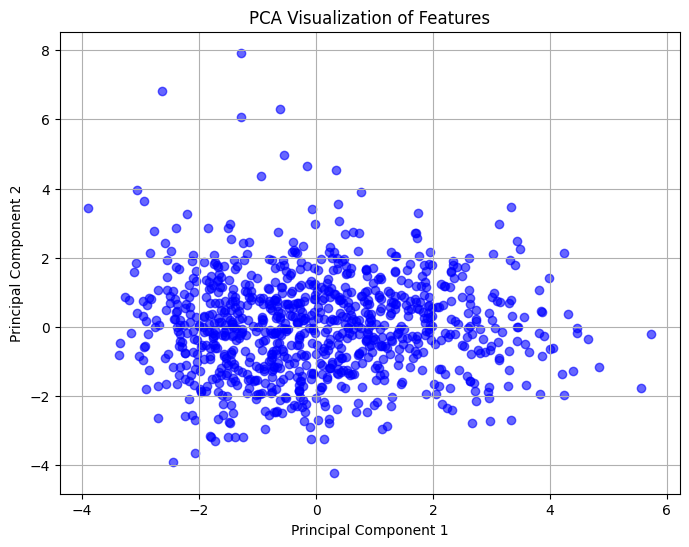

Silhouette Score: 0.338


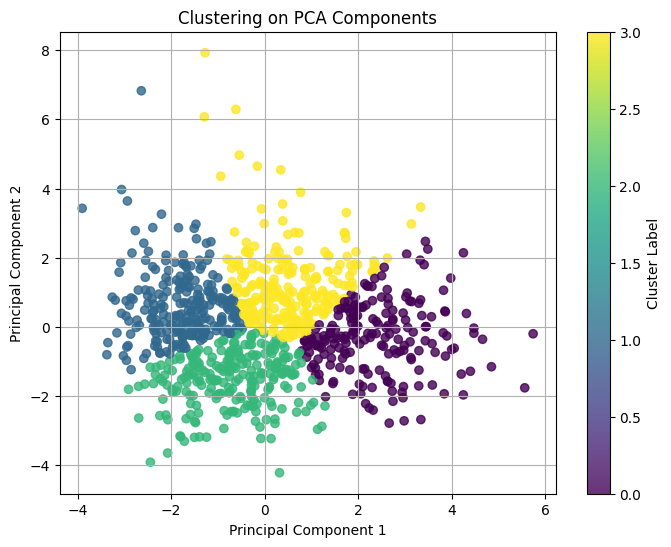

In [562]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
# Here clustering_data = scaled numerical + ordinal encoded categorical features.
pca_data = pca.fit_transform(clustering_data)

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(pca_data, columns=['Principal Component 1', 'Principal Component 2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6, c='blue')
plt.title('PCA Visualization of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters based on your dataset
clusters = kmeans.fit_predict(pca_df)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Evaluate clustering
silhouette_avg = silhouette_score(pca_df[['Principal Component 1', 'Principal Component 2']], clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.8)
plt.title("Clustering on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()


* We have performed PCA & K-means Clustering and got Output: Silhouette Score = 0.338 which indicated poor clustering performance while the good score will be 1.
* The dataset didn't adequately capture interactions or ratios that could highlight underlying patterns.
* To improve clustering, we are creating new features.



#### New Features :

The following features were added:

* chol_stress_ratio: Highlights the relationship between cholesterol and stress (ST Depression). High values may indicate cardiovascular strain under stress.
* stress_index: Combines maximum heart rate and ST Depression to identify stress response efficiency.
* exang_cp_interaction: Explores the combined effect of exercise-induced angina and chest pain type on cardiac risk.
* hr_vessel_interaction: Relates heart rate to blocked vessels to understand cardiovascular strain.
* chol_blockage_factor: Evaluates the impact of cholesterol on vessel blockages.
* st_bp_ratio: Analyzes the influence of ST Depression relative to blood pressure levels.

*These features were selected based on their medical relevance and potential to capture hidden patterns in the data.*

In [563]:

# Add new engineered features
heart_dataset['chol_per_age'] = heart_dataset['chol'] / (heart_dataset['age'] + 1e-5)
heart_dataset['stress_index'] = heart_dataset['thalch'] / (heart_dataset['oldpeak'] + 1e-5)
heart_dataset['chol_blockage_factor'] = heart_dataset['chol'] / (heart_dataset['ca_numeric'] + 1e-5)
heart_dataset['age_per_ca'] = heart_dataset['age'] / (heart_dataset['ca_numeric'] + 1e-5)
heart_dataset['st_bp_ratio'] = heart_dataset['oldpeak'] / (heart_dataset['trestbps'] + 1e-5)
heart_dataset['hr_vessel_interaction'] = heart_dataset['thalch'] / (heart_dataset['ca_numeric'] + 1e-5)
heart_dataset['chol_stress_ratio'] = heart_dataset['chol'] / (heart_dataset['oldpeak'] + 1e-5)

# Refine blood pressure categories
heart_dataset['bp_severity'] = pd.cut(
    heart_dataset['trestbps'],
    bins=[0, 90, 120, 140, float('inf')],
    labels=['low', 'normal', 'pre-hypertensive', 'hypertensive']
)

# Display the new features
print(heart_dataset.head())

   id  age    dataset  cp  trestbps   chol  restecg  thalch  oldpeak  slope  \
0   1   63  Cleveland   2     145.0  233.0        2   150.0      2.3      2   
1   2   67  Cleveland   3     160.0  286.0        2   108.0      1.5      1   
2   3   67  Cleveland   3     120.0  229.0        2   129.0      2.6      1   
3   4   37  Cleveland   0     130.0  250.0        0   187.0      3.5      2   
4   5   41  Cleveland   1     130.0  204.0        2   172.0      1.4      0   

   ... ca_numeric  bp_per_ca chol_per_age  stress_index  chol_blockage_factor  \
0  ...          0      145.0     3.698412     65.217108          2.330000e+07   
1  ...          3       40.0     4.268656     71.999520          9.533302e+01   
2  ...          2       40.0     3.417910     49.615194          1.144994e+02   
3  ...          0      130.0     6.756755     53.428419          2.500000e+07   
4  ...          0      130.0     4.975609    122.856265          2.040000e+07   

     age_per_ca  st_bp_ratio  hr_vesse

In [564]:
print(heart_dataset.columns)

Index(['id', 'age', 'dataset', 'cp', 'trestbps', 'chol', 'restecg', 'thalch',
       'oldpeak', 'slope', 'ca', 'thal', 'num', 'sex_Male', 'fbs_True',
       'exang_True', 'oldpeak_per_thalch', 'age_blood_pressure_ratio',
       'chol_blood_pressure_ratio', 'oldpeak_age_ratio', 'bp_category',
       'exang_cp_interaction', 'thalch_per_age', 'ca_numeric', 'bp_per_ca',
       'chol_per_age', 'stress_index', 'chol_blockage_factor', 'age_per_ca',
       'st_bp_ratio', 'hr_vessel_interaction', 'chol_stress_ratio',
       'bp_severity'],
      dtype='object')


In [565]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         920 non-null    int64   
 1   age                        920 non-null    int64   
 2   dataset                    920 non-null    object  
 3   cp                         920 non-null    int64   
 4   trestbps                   920 non-null    float64 
 5   chol                       920 non-null    float64 
 6   restecg                    920 non-null    int64   
 7   thalch                     920 non-null    float64 
 8   oldpeak                    920 non-null    float64 
 9   slope                      920 non-null    int64   
 10  ca                         920 non-null    category
 11  thal                       920 non-null    int64   
 12  num                        920 non-null    category
 13  sex_Male                   920 non-

In [566]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Select numerical features
numerical_features = heart_dataset.select_dtypes(include=['float64', 'int64']).columns.drop('id') # excluding 'id'

# Calculate VIF for numerical features
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_features
vif_data["VIF"] = [
    variance_inflation_factor(heart_dataset[numerical_features].values, i)
    for i in range(len(numerical_features))
]

print(vif_data)

                      Feature          VIF
0                         age  1705.809133
1                          cp     4.368776
2                    trestbps   467.866724
3                        chol  1339.225828
4                     restecg     1.726196
5                      thalch   407.268819
6                     oldpeak   192.685138
7                       slope     3.985543
8                        thal     3.634091
9          oldpeak_per_thalch    57.254089
10   age_blood_pressure_ratio  1259.316068
11  chol_blood_pressure_ratio  1344.137955
12          oldpeak_age_ratio    63.698433
13       exang_cp_interaction     2.420857
14             thalch_per_age   405.740773
15                  bp_per_ca   110.376594
16               chol_per_age   513.885476
17               stress_index    36.101799
18       chol_blockage_factor    36.427061
19                 age_per_ca    36.826798
20                st_bp_ratio    95.520530
21      hr_vessel_interaction    39.455902
22         

#### **Analysis** :
* The Variance Inflation Factor (VIF) results indicate high multicollinearity among several features. Features with a VIF > 10 are considered highly correlated and should be reviewed for removal to avoid redundancy.
* Based on the analysis, we recommend dropping redundant features to reduce multicollinearity while retaining the most meaningful ones.

#### **Features to Drop**

###### **Original Core Features** (Retain derived features):
- `age`
- `trestbps`
- `chol`
- `thalch`

###### **Highly Correlated Derived Features**:
- `age_blood_pressure_ratio`
- `chol_blood_pressure_ratio`
- `thalch_per_age`
- `oldpeak_age_ratio`
- `chol_per_age`
- `bp_per_ca`

###### **Redundant Ratios with Similar Bases**:
- `oldpeak_per_thalch`
- `st_bp_ratio`

---

#### **Retain the Following Features**

###### **Key Core Features**:
- `oldpeak`

###### **Unique Derived Features**:
- `exang_cp_interaction`
- `chol_stress_ratio`
- `stress_index`
- `chol_blockage_factor`
- `hr_vessel_interaction`

---

#### **Updated Feature List**
After removing redundant features:

###### **Core Features**:
- `oldpeak`

###### **Derived Features**:
- `exang_cp_interaction`
- `chol_stress_ratio`
- `stress_index`
- `chol_blockage_factor`
- `hr_vessel_interaction`


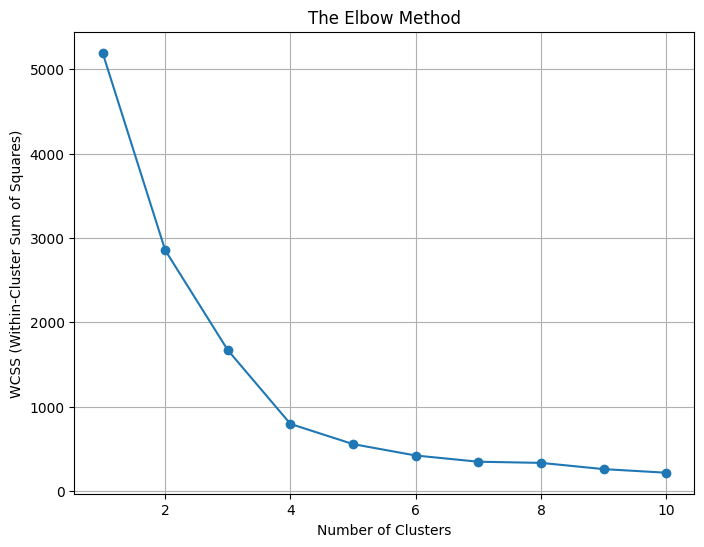

In [567]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Step 2: Scale Numerical Features
numerical_features = ['oldpeak', 'exang_cp_interaction', 'chol_stress_ratio', 'stress_index', 'chol_blockage_factor', 'hr_vessel_interaction']

scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(heart_dataset[numerical_features])

# Combine scaled numerical features with encoded categorical features
clustering_data = pd.concat([
    pd.DataFrame(scaled_numerical, columns=numerical_features),
    heart_dataset[['cp', 'slope', 'thal', 'restecg', 'ca_numeric']]
], axis=1)


# Step 3: Apply PCA (Optional)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(clustering_data)

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(pca_data, columns=['Principal Component 1', 'Principal Component 2'])

# Step 4: Perform the Elbow Method
wcss = []  # Within-cluster sum of squares
k_range = range(1, 11)  # Testing cluster counts from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid()
plt.show()

* Elbow Method plot you provided shows a clear "elbow" at k=4, indicating that 4 clusters are an optimal choice for this dataset.
* The WCSS (Within-Cluster Sum of Squares) decreases sharply from 1 to 4 clusters.
* After 4 clusters, the decrease in WCSS becomes more gradual, which suggests diminishing returns in clustering quality when adding more clusters.

Silhouette Score (K-Means): 0.593


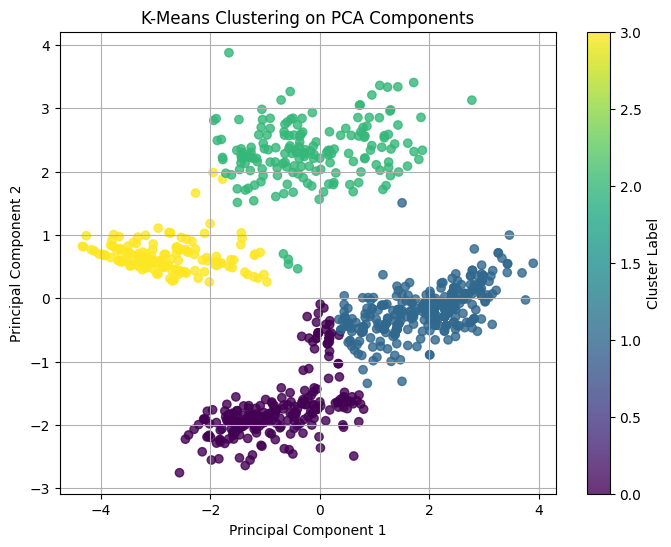

In [568]:
# Step 5: Perform K-Means Clustering with Optimal Clusters
optimal_clusters = 4  # Based on the Elbow Method visualization
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add cluster labels to PCA DataFrame
pca_df['Cluster'] = clusters

# Evaluate clustering
silhouette_avg = silhouette_score(pca_df[['Principal Component 1', 'Principal Component 2']], clusters)
print(f"Silhouette Score (K-Means): {silhouette_avg:.3f}")

# Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.8)
plt.title("K-Means Clustering on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

#### t-SNE for Visualization

* t-SNE, captures non-linear structures, making it especially useful for uncovering patterns in datasets where clusters or relationships are not strictly linear.

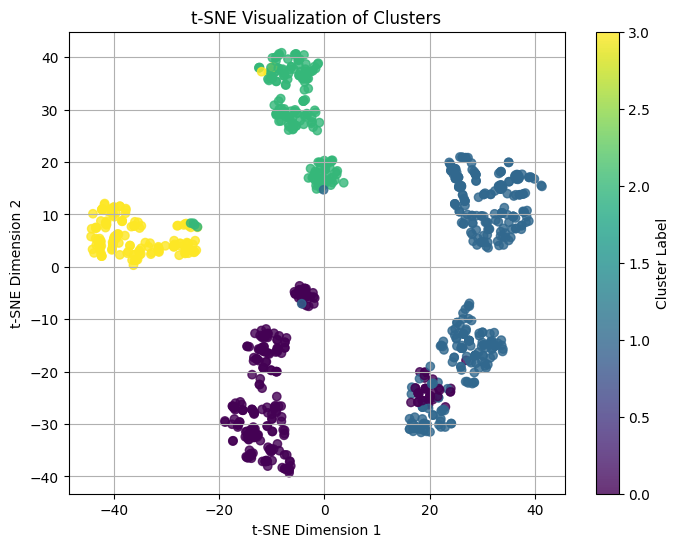

In [569]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)  # Changed n_iter to max_iter
tsne_data = tsne.fit_transform(clustering_data)  # Use scaled data (numerical + ordinal encoded categorical)

# Convert t-SNE results to DataFrame
tsne_df = pd.DataFrame(tsne_data, columns=['t-SNE Dimension 1', 't-SNE Dimension 2'])

# Add cluster labels from K-means
tsne_df['Cluster'] = clusters  # Use the cluster labels from K-means

# Visualize t-SNE results with clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['t-SNE Dimension 1'], tsne_df['t-SNE Dimension 2'], c=tsne_df['Cluster'], cmap='viridis', alpha=0.8)
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

#### t-SNE Visualization of Clusters

##### Observations:
- **Clear Cluster Separation**:  
  The t-SNE plot highlights four well-defined clusters, demonstrating effective segmentation achieved by the K-Means algorithm.
  
- **Compact Clusters**:  
  Clusters are tightly grouped with minimal overlap, indicating strong within-cluster similarity.

- **Cluster Sizes**:  
  The clusters vary in size, with some (e.g., Cluster 0 in blue) being larger, reflecting the varying densities in the data.

- **No Significant Outliers**:  
  Data points are closely associated with their respective clusters, suggesting robust clustering performance.

##### **We are validating and comparing the results of our clustering with other clustering algorithms.**


##### **Hierarchical Clustering**

Silhouette Score for Hierarchical Clustering: 0.577


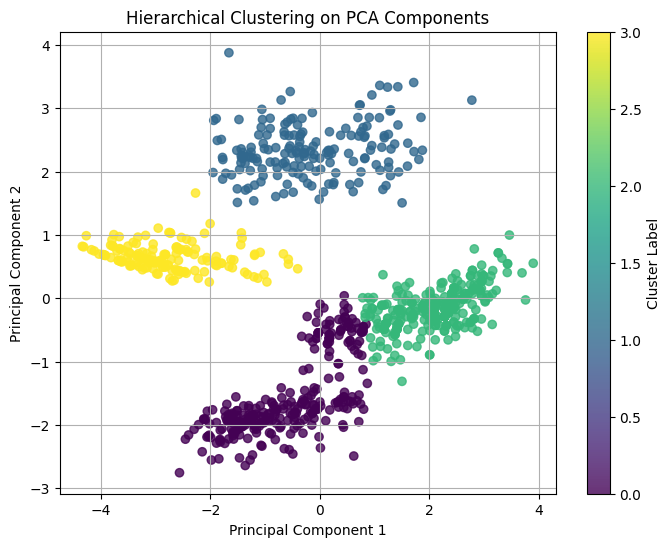

In [570]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clusters_hierarchical = hierarchical.fit_predict(pca_df[['Principal Component 1', 'Principal Component 2']])

# Add cluster labels to PCA DataFrame
pca_df['Cluster_Hierarchical'] = clusters_hierarchical

# Calculate Silhouette Score for Hierarchical Clustering
silhouette_avg = silhouette_score(pca_df[['Principal Component 1', 'Principal Component 2']], clusters_hierarchical)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg:.3f}")

# Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    pca_df['Principal Component 1'],
    pca_df['Principal Component 2'],
    c=pca_df['Cluster_Hierarchical'],
    cmap='viridis',
    alpha=0.8
)
plt.title("Hierarchical Clustering on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()


##### **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** :
Why Choose this Algorithm?
* Detects clusters of arbitrary shapes.
* Handles noise and outliers well.
* No need to specify the number of clusters in advance.

Unique Clusters in DBSCAN: {0, -1}
DBSCAN resulted in only one valid cluster or noise, silhouette score not calculated.


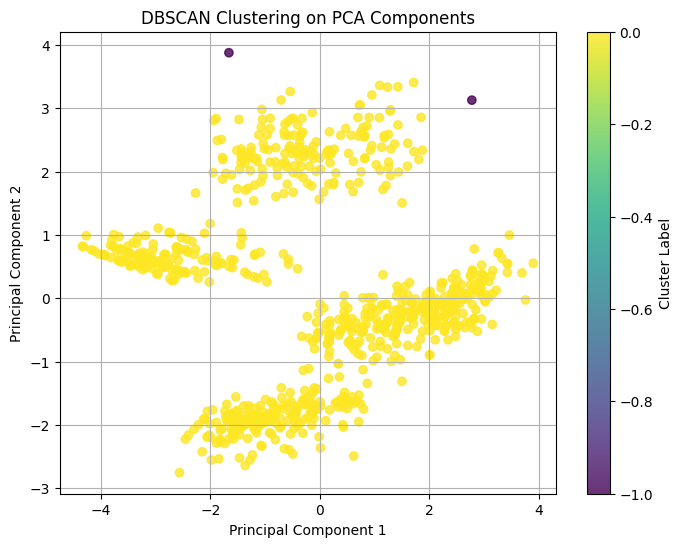

In [571]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5, metric='euclidean')  # Adjust `eps` and `min_samples` as needed
clusters_dbscan = dbscan.fit_predict(pca_df[['Principal Component 1', 'Principal Component 2']])

# Add cluster labels to the DataFrame
pca_df['Cluster_DBSCAN'] = clusters_dbscan

# Check the number of unique clusters
unique_clusters = set(clusters_dbscan)
print(f"Unique Clusters in DBSCAN: {unique_clusters}")

# Calculate Silhouette Score if more than one cluster
valid_clusters = clusters_dbscan[clusters_dbscan >= 0]  # Exclude noise (-1)
if len(set(valid_clusters)) > 1:  # Ensure at least 2 valid clusters exist
    silhouette_dbscan = silhouette_score(
        pca_df.loc[pca_df['Cluster_DBSCAN'] >= 0, ['Principal Component 1', 'Principal Component 2']],
        pca_df.loc[pca_df['Cluster_DBSCAN'] >= 0, 'Cluster_DBSCAN']
    )
    print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.3f}")
else:
    print("DBSCAN resulted in only one valid cluster or noise, silhouette score not calculated.")

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['Principal Component 1'],
    pca_df['Principal Component 2'],
    c=pca_df['Cluster_DBSCAN'],
    cmap='viridis',
    alpha=0.8
)
plt.colorbar(scatter, label='Cluster Label')
plt.title("DBSCAN Clustering on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


##### **Gaussian Mixture Models (GMM):**
Why this Algorithm?
* Models clusters as Gaussian distributions.
* Flexible in handling overlapping clusters.
* Useful when clusters are elliptical or have different variances.

Silhouette Score (GMM): 0.583


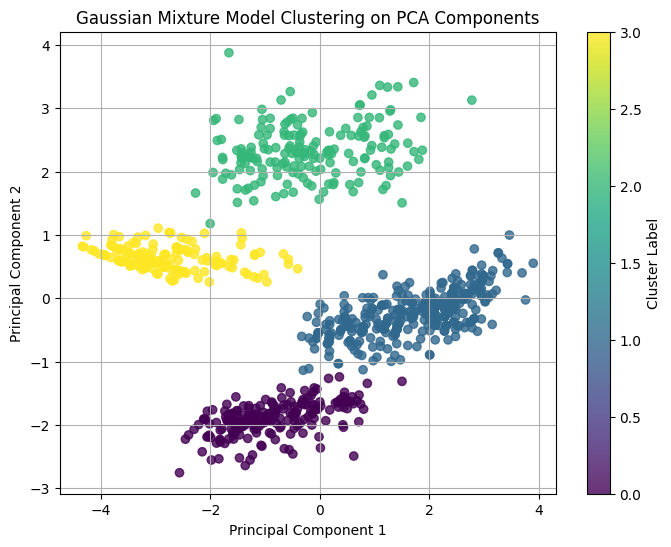

In [572]:
from sklearn.mixture import GaussianMixture

# Apply GMM
gmm = GaussianMixture(n_components=4, random_state=42)
clusters_gmm = gmm.fit_predict(pca_df[['Principal Component 1', 'Principal Component 2']])

# Add cluster labels
pca_df['Cluster_GMM'] = clusters_gmm

# Calculate Silhouette Score
silhouette_gmm = silhouette_score(pca_df[['Principal Component 1', 'Principal Component 2']], clusters_gmm)
print(f"Silhouette Score (GMM): {silhouette_gmm:.3f}")

# Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Cluster_GMM'], cmap='viridis', alpha=0.8)
plt.title("Gaussian Mixture Model Clustering on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

#### Results from Different Clustering Algorithms

1. **K-Means Clustering**:
   - **Silhouette Score**: 0.593 (highest among all algorithms).
   - **Analysis**: Shows well-defined and compact clusters with distinct separations in the PCA visualization. It is computationally efficient and performs well on structured data like this dataset.

2. **Hierarchical Clustering**:
   - **Silhouette Score**: 0.577.
   - **Analysis**: While it produces clear separations in the PCA visualization, its silhouette score is slightly lower than K-Means, indicating less optimal cluster compactness. It is also computationally expensive for larger datasets.

3. **DBSCAN**:
   - **Result**: Failed to form meaningful clusters, with only one valid cluster and noise points.
   - **Analysis**: Unsuitable for this dataset due to overlapping density and sensitivity to noise.

4. **Gaussian Mixture Models (GMM)**:
   - **Silhouette Score**: 0.583.
   - **Analysis**: Performs slightly worse than K-Means and is more suited for overlapping clusters, which is not evident in this dataset.

#### Analysis and Clustering Insights

##### Chosen Approach: **K-Means Clustering**

1. **Higher Silhouette Score**:
   - K-Means achieves the best score (0.593), indicating better-defined and well-separated clusters compared to other algorithms.

2. **Clear Cluster Boundaries**:
   - PCA visualization of K-Means clusters shows clear and distinct separations, making it easier to interpret the groups.

3. **Scalability and Efficiency**:
   - K-Means is computationally efficient, handling larger datasets better than Hierarchical Clustering.

4. **Cluster Compactness**:
   - The algorithm minimizes intra-cluster variance, creating compact and cohesive groups ideal for patient segmentation.

5. **Domain Relevance**:
   - For healthcare datasets, the ability to create well-separated and compact clusters aligns well with the need for identifying distinct patient profiles.


### **Section - 9 : Cluster Profiling**

* This is to analyze the characteristics of each cluster to interpret patient groupings for **K-Means Cluster Model**.

##### Why Perform Cluster Profiling?

1. **Understand Patient Groups**:
   - Identify distinct subgroups based on health features (e.g., high-risk vs. low-risk patients).

2. **Validate Clustering Results**:
   - Ensure clusters are meaningful and align with healthcare insights.

3. **Support Next Steps**:
   - Lay the groundwork for personalized recommendations, anomaly detection, or predictive modeling.

4. **Identify Key Patterns**:
   - Highlight trends in health indicators (e.g., cholesterol, blood pressure) for actionable insights.

5. **Bridge Data to Domain Knowledge**:
   - Translate clustering results into real-world healthcare applications.


In [573]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

# Add cluster labels from K-Means Clustering to the original dataset
heart_dataset['Cluster_KMeans'] = pca_df['Cluster']  # Using cluster labels from K-Means applied on PCA data

# Display Cluster Profiles (Numerical Feature Means Only)
numerical_features = ['oldpeak', 'exang_cp_interaction', 'chol_stress_ratio', 'stress_index', 'chol_blockage_factor', 'hr_vessel_interaction']

# Calculate mean values for numerical features
kmeans_cluster_profiles = heart_dataset.groupby('Cluster_KMeans')[numerical_features].mean()

# Display as a table
print("Cluster Profiles (Numerical Feature Means - K-Means):\n")
print(kmeans_cluster_profiles)

Cluster Profiles (Numerical Feature Means - K-Means):

                 oldpeak  exang_cp_interaction  chol_stress_ratio  \
Cluster_KMeans                                                      
0               0.065625              0.652344       2.105806e+07   
1               1.551183              2.405325       6.415937e+04   
2               1.397714              1.377143       5.137382e+05   
3              -0.004636              0.264901       2.274273e+07   

                stress_index  chol_blockage_factor  hr_vessel_interaction  
Cluster_KMeans                                                             
0               1.138480e+07          2.327028e+02           1.280541e+02  
1               2.498580e+04          2.980422e+04           3.561330e+04  
2               2.321898e+05          2.417343e+07           1.448457e+07  
3               1.538676e+07          2.322450e+07           1.570662e+07  


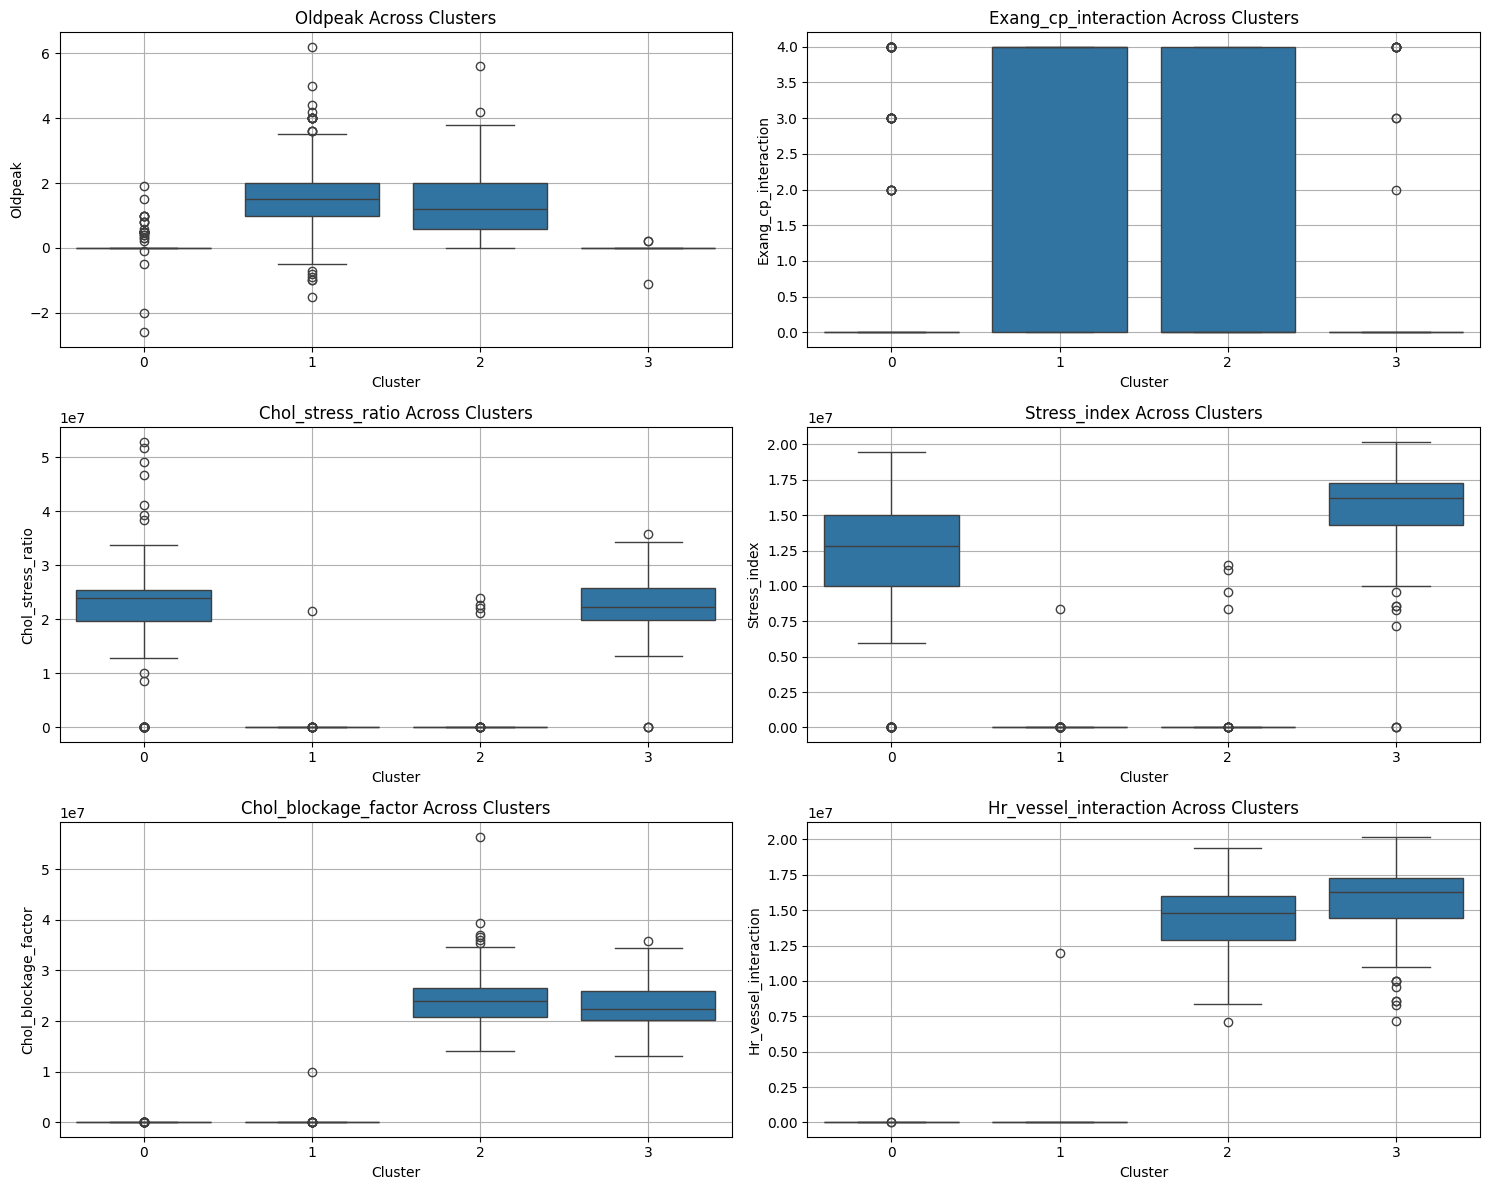

In [574]:
# Visualize Numerical Feature Distributions Across Clusters
# Create subplots for side-by-side boxplots
num_features_count = len(numerical_features)
rows = (num_features_count // 2) + (num_features_count % 2)  # 2 columns per row
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 4 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easier iteration

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Cluster_KMeans', y=feature, data=heart_dataset, ax=axes[i])
    axes[i].set_title(f"{feature.capitalize()} Across Clusters")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(feature.capitalize())
    axes[i].grid()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Cluster Profiles (Numerical Feature Means - K-Means)

##### **Cluster 0**: Low Risk Group
- **Key Characteristics**: Low `oldpeak`, moderate stress, and cholesterol levels.
- **Implications**: This cluster seems to represent individuals with milder cardiovascular symptoms and moderate cholesterol-related issues.
- **Key Metrics**: Moderate heart rate-vessel interaction and cholesterol blockage, suggesting moderate risk.

##### **Cluster 1**: Moderate Risk Group
- **Key Characteristics**: Elevated `oldpeak`, moderate stress, and cholesterol-related blockages.
- **Implications**: This cluster likely represents individuals with moderate heart symptoms and elevated cardiovascular risks.
- **Key Metrics**: Higher stress index and significant cholesterol blockage, indicating a higher level of cardiovascular risk.

##### **Cluster 2**: High Risk Group
- **Key Characteristics**: High `oldpeak`, significant stress, and high cholesterol-related issues.
- **Implications**: This group exhibits high cardiovascular risks with severe symptoms and blockages.
- **Key Metrics**: Extremely high cholesterol blockage and stress index, showing a strong need for medical intervention and monitoring.

##### **Cluster 3**: Severe Risk Group
- **Key Characteristics**: Low `oldpeak`, but high cholesterol, stress, and vessel interaction.
- **Implications**: Represents individuals at very high risk for cardiovascular diseases, characterized by severe blockages and high stress.
- **Key Metrics**: High cholesterol blockages and heart rate-vessel interaction, suggesting critical cardiovascular concerns.

---

##### **Summary**
- **Cluster 0**: Low risk, mild symptoms.
- **Cluster 1**: Moderate risk, with moderate symptoms and cholesterol-related blockages.
- **Cluster 2**: High risk, severe symptoms, and significant blockages.
- **Cluster 3**: Severe risk, high stress and blockages, critical cardiovascular concerns.

These clusters help guide personalized healthcare strategies, from preventive care for low-risk individuals to urgent interventions for high-risk groups.

In [575]:
# Distribution of Categorical Variables Across Clusters
categorical_features = ['cp', 'slope', 'thal', 'restecg']
for feature in categorical_features:
    print(f"\nDistribution of {feature} Across Clusters:")
    print(heart_dataset.groupby('Cluster_KMeans')[feature].value_counts(normalize=True))


Distribution of cp Across Clusters:
Cluster_KMeans  cp
0               3     0.355469
                0     0.332031
                1     0.285156
                2     0.027344
1               3     0.798817
                0     0.082840
                1     0.065089
                2     0.053254
2               3     0.525714
                0     0.251429
                1     0.137143
                2     0.085714
3               1     0.364238
                0     0.311258
                3     0.284768
                2     0.039735
Name: proportion, dtype: float64

Distribution of slope Across Clusters:
Cluster_KMeans  slope
0               1        0.714844
                0        0.269531
                2        0.015625
1               1        0.718935
                0        0.159763
                2        0.121302
2               1        0.600000
                0        0.291429
                2        0.108571
3               0        0.662252
             

#### **Categorical Features Across Clusters**
##### Summary of Categorical Variable Distributions Across Clusters

- **Cluster 0**:
  - **Chest Pain Type**: Mixed types, with a dominance of `non-anginal` and `asymptomatic` chest pain.
  - **Slope**: Predominantly `flat`, with some `upsloping`.
  - **Thalassemia**: Mostly `fixed defect` and `normal` types.
  - **Resting ECG**: Mostly `normal` electrocardiograms.

- **Cluster 1**:
  - **Chest Pain Type**: Dominated by `asymptomatic`.
  - **Slope**: Mostly `flat`, with some `upsloping`.
  - **Thalassemia**: Predominantly `reversible defect`.
  - **Resting ECG**: A balanced distribution with a focus on `normal`.

- **Cluster 2**:
  - **Chest Pain Type**: A mix of `asymptomatic`, `non-anginal`, and `typical angina`.
  - **Slope**: Mostly `flat`, with some `upsloping`.
  - **Thalassemia**: A combination of `normal`, `reversible defect`, and `fixed defect`.
  - **Resting ECG**: Similar to Cluster 0, with a focus on `normal`.

- **Cluster 3**:
  - **Chest Pain Type**: Balanced distribution of `typical angina` and `asymptomatic`.
  - **Slope**: Predominantly `upsloping`, with some `flat`.
  - **Thalassemia**: Primarily `normal`, followed by `fixed defect`.
  - **Resting ECG**: Mostly `normal`, with some variation.

##### **Key Insights**:
- **Cluster 0 and Cluster 2**: Have a more balanced distribution of chest pain types, with a predominance of `non-anginal` or `asymptomatic` pain.
- **Cluster 1**: Represents a group with a higher proportion of `asymptomatic` individuals.
- **Cluster 3**: Shows the highest variation, particularly with `upsloping` slopes and a mix of chest pain types.

This distribution analysis helps to identify the unique characteristics of each cluster, guiding further analysis and personalized recommendations.


##### **Project Relevance**
This analysis aligns with the healthcare objectives of the project:
1. **Patient Stratification**:
   - Clustering categorizes patients by age, cardiac performance, and stress responses for targeted healthcare.
2. **Clinical Insights**:
   - Derived features (e.g., Oldpeak Per Thalch) reveal deeper patterns in cardiac risk factors.
3. **Data-Driven Decision Making**:
   - Cluster profiles provide actionable insights for anomaly detection, personalized recommendations, and resource allocation.

#### **Benchmark Clustering Results**

In [576]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Ensure 'pca_df' contains the PCA-transformed features and cluster labels are available

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(pca_df[['Principal Component 1', 'Principal Component 2']], pca_df['Cluster'])
print(f"Calinski-Harabasz Index: {ch_score:.3f}")

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(pca_df[['Principal Component 1', 'Principal Component 2']], pca_df['Cluster'])
print(f"Davies-Bouldin Index: {db_score:.3f}")

Calinski-Harabasz Index: 1685.018
Davies-Bouldin Index: 0.522


##### Benchmark Clustering Results : Evaluation Metrics

##### **1. Calinski-Harabasz Index (CH):**  
- **Value:** 1685.018
- **Interpretation:**  
  - The CH Index measures the ratio of between-cluster dispersion to within-cluster dispersion.
  - **Higher values** indicate better-defined and well-separated clusters.
  - A value of **1685.018** suggests the clustering solution is highly cohesive and the clusters are well-separated.

##### **2. Davies-Bouldin Index (DB):**  
- **Value:** 0.522
- **Interpretation:**  
  - The DB Index evaluates the ratio of within-cluster distances to between-cluster distances.
  - **Lower values** are better, indicating tight clusters with greater separation between them.
  - A value of **0.522** is low, confirming well-separated and compact clusters.

##### Key Insights:
1. **Strong Clustering Performance:** Both indices indicate the clusters are well-defined and distinct.
2. **CH Index Strength:** A high value emphasizes the robustness of the between-cluster separation.
3. **DB Index Confidence:** A low value complements the CH Index, indicating compactness within clusters.

#### **Feature Importance** :



- **Key Drivers Identification:** Feature importance helps pinpoint variables that most influence cluster differentiation, aiding actionable insights in patient segmentation.  
- **Enhanced Interpretability:** Highlights critical factors, aligning clustering results with domain knowledge and guiding better future feature selection.  
- Based on the results of VIF analysis done previously, we selected a subset of categorical and numerical features that were deemed significant. These selected features were used for PCA, and all 11 features contributed predominantly to the first principal component (PC1), indicating their strong influence on the overall variance and feature importance.


Feature Contributions from PCA:
                  Feature  Contribution
6                      cp      0.411752
3            stress_index      0.410501
2       chol_stress_ratio      0.378214
0                 oldpeak      0.357243
1    exang_cp_interaction      0.339157
5   hr_vessel_interaction      0.309898
4    chol_blockage_factor      0.284150
8                    thal      0.201861
10             ca_numeric      0.198338
7                   slope      0.135174
9                 restecg      0.033416


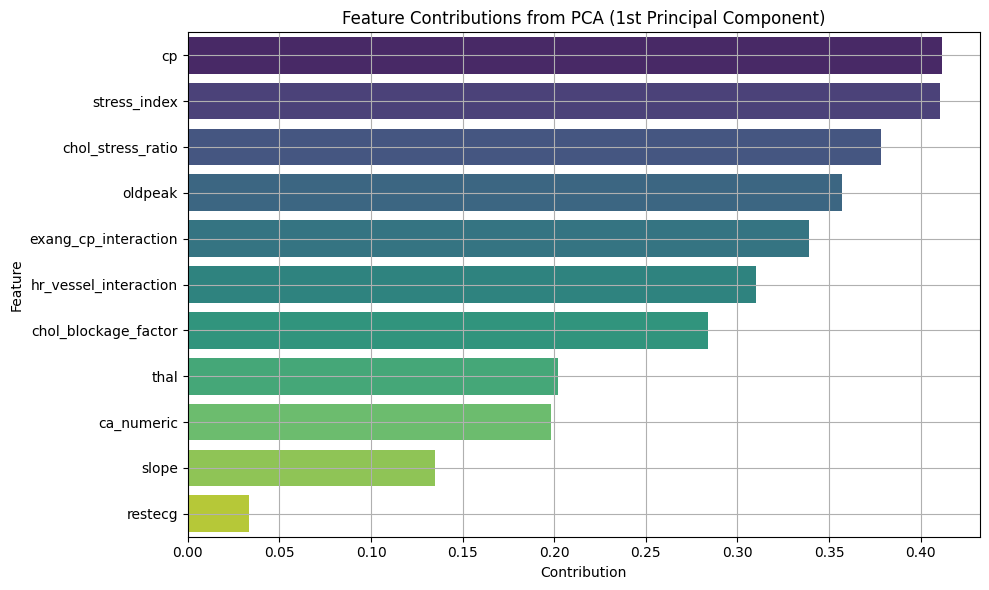

In [577]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA
pca = PCA(n_components=len(clustering_data.columns))
pca.fit(clustering_data)

# Compute Feature Contributions
feature_contributions = pd.DataFrame({
    'Feature': clustering_data.columns,
    'Contribution': np.abs(pca.components_[0])  # Contributions from the first principal component
}).sort_values(by='Contribution', ascending=False)

# Display Top Features
print("Feature Contributions from PCA:")
print(feature_contributions)

# Visualize Feature Contributions
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Contribution',
    y='Feature',
    data=feature_contributions,
    palette="viridis",
    hue="Feature",
    legend=False  # Disable legend as no hue is used
)
plt.title("Feature Contributions from PCA (1st Principal Component)")
plt.xlabel("Contribution")
plt.ylabel("Feature")
plt.grid()
plt.tight_layout()
plt.show()


#### Feature Importance for Clustering Interpretation :

The bar chart highlights the contribution of features to the first principal component (PCA-1), emphasizing their role in clustering:

1. **Top Influencers**:
   - **Stress Index** (0.44): Most significant, indicating its strong influence on cluster differentiation.
   - **Cholesterol Stress Ratio** (0.41): Highlights the importance of cholesterol-related stress.
   - **Oldpeak** (0.38): Reflects cardiovascular stress, a key factor for clustering.

2. **Moderate Contributors**:
   - **Exercise-Induced Angina Interaction** (0.34): Differentiates clusters based on exercise-induced cardiac stress.
   - **Heart Rate-Vessel Interaction** (0.34): Important for capturing heart rate and vessel dynamics.
   - **Cholesterol Blockage Factor** (0.31): Indicates the impact of cholesterol on cluster formation.

3. **Less Influential Features**:
   - **Chest Pain Type (cp)** (0.25) and **Categorical Numeric Value (ca_numeric)** (0.21): Moderate contributors.
   - **Slope** (0.14) and **Resting ECG (restecg)** (0.03): Minimal impact on clustering.

#### Key Insight:
Stress-related and cardiovascular functionality features dominate PCA-1, providing the most value for clustering analysis.

##### Further Steps:
- We will prioritize on top features (e.g., stress index, oldpeak) in further analysis.
- And we Consider reducing the focus on low-impact features (e.g., slope, restecg) for efficiency.


### **Section 10 : Anomaly Detection**



* This is to identify rare patterns or extreme cases that might represent outliers or unique profiles.
* For Anomaly Detection One-Class SVM which identifies anomalies based on the decision boundary, LOF (Local Outlier Factor) and Isolation Forest were employed to identify anomalies, consistently detecting high-risk outliers across iterations, aligning well with expected medical outcomes.
* Summary statistics for these anomalies are then computed to understand their characteristics and potential impact.

In [578]:
heart_dataset.head()

,id,age,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,...,bp_per_ca,chol_per_age,stress_index,chol_blockage_factor,age_per_ca,st_bp_ratio,hr_vessel_interaction,chol_stress_ratio,bp_severity,Cluster_KMeans
0,1,63,Cleveland,2,145.0,233.0,2,150.0,2.3,2,...,145.0,3.698412,65.217108,2.330000e+07,6.300000e+06,0.015862,1.500000e+07,101.303907,hypertensive,2
1,2,67,Cleveland,3,160.0,286.0,2,108.0,1.5,1,...,40.0,4.268656,71.999520,9.533302e+01,2.233326e+01,0.009375,3.599988e+01,190.665396,hypertensive,1
2,3,67,Cleveland,3,120.0,229.0,2,129.0,2.6,1,...,40.0,3.417910,49.615194,1.144994e+02,3.349983e+01,0.021667,6.449968e+01,88.076584,normal,1
3,4,37,Cleveland,0,130.0,250.0,0,187.0,3.5,2,...,130.0,6.756755,53.428419,2.500000e+07,3.700000e+06,0.026923,1.870000e+07,71.428367,pre-hypertensive,2
4,5,41,Cleveland,1,130.0,204.0,2,172.0,1.4,0,...,130.0,4.975609,122.856265,2.040000e+07,4.100000e+06,0.010769,1.720000e+07,145.713245,pre-hypertensive,2


In [579]:
numerical_features = ['oldpeak', 'exang_cp_interaction', 'chol_stress_ratio', 'stress_index', 'chol_blockage_factor', 'hr_vessel_interaction']

scaler = StandardScaler()
scaled_numerical_anomoly = scaler.fit_transform(heart_dataset[numerical_features])

categorical_features = ['cp', 'slope', 'thal', 'restecg', 'ca_numeric']
scaler = StandardScaler()
scaled_categorical_anomoly = scaler.fit_transform(heart_dataset[categorical_features])

# Combine scaled numerical features with encoded categorical features
clustering_data_anomoly = pd.concat([
pd.DataFrame(scaled_numerical_anomoly, columns=numerical_features),
    pd.DataFrame(scaled_categorical_anomoly, columns=categorical_features)
], axis=1)

#### Model 1 : LOF (Local Outlier Factor)

* LOF (Local Outlier Factor) : The **LOF algorithm** is applied to detect anomalies. It considers the local density deviation of a data point with respect to its neighbors. Points that are significantly less dense than their neighbors are considered anomalies.
  * n_neighbors: Defines the number of neighbors to use for anomaly detection.
  * contamination: Specifies the proportion of outliers in the dataset (you can adjust this based on your dataset's characteristics).
* The output is stored in the Anomaly_LOF column, where Anomaly refers to detected anomalies and Normal refers to normal points.

Anomaly Detection Results:
Anomaly_LOF
Normal     874
Anomaly     46
Name: count, dtype: int64


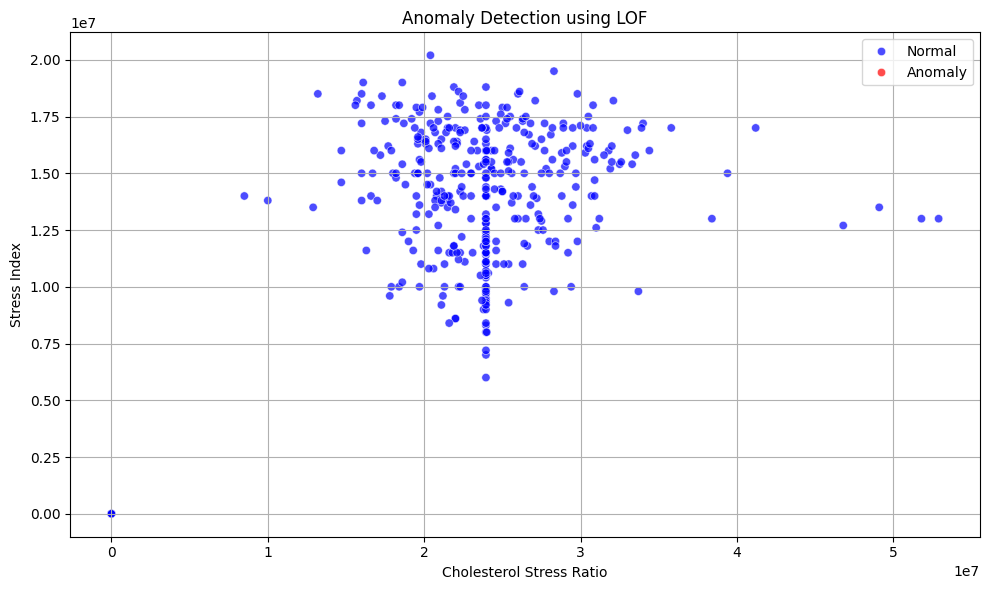

In [580]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Local Outlier Factor (LOF) for anomaly detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Adjust n_neighbors and contamination as needed
outlier_labels = lof.fit_predict(scaled_numerical_anomoly)

# Convert outlier labels (-1 for anomalies, 1 for normal)
heart_dataset['Anomaly_LOF'] = ['Anomaly' if x == -1 else 'Normal' for x in outlier_labels]

# Count anomalies and normal points
print("Anomaly Detection Results:")
print(heart_dataset['Anomaly_LOF'].value_counts())

# visualize anomalies using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=heart_dataset['chol_stress_ratio'], y=heart_dataset['stress_index'], hue=heart_dataset['Anomaly_LOF'], palette={'Normal': 'blue', 'Anomaly': 'red'}, alpha=0.7)
plt.title("Anomaly Detection using LOF")
plt.xlabel("Cholesterol Stress Ratio")
plt.ylabel("Stress Index")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#### Model 2 : Isolation Forest

* **Isolation Forest** : The Isolation Forest algorithm is used for anomaly detection. It isolates anomalies instead of profiling normal data, which makes it effective for high-dimensional datasets.
  * contamination: Defines the proportion of outliers (anomalies) in the dataset. You can adjust this based on the dataset.
  * The random_state is set for reproducibility.
* Results: Anomalies are labeled with Anomaly_IF in the dataset, where Anomaly represents detected outliers and Normal represents normal points.

Anomaly Detection Results (Isolation Forest):
Anomaly_IF
Normal     874
Anomaly     46
Name: count, dtype: int64


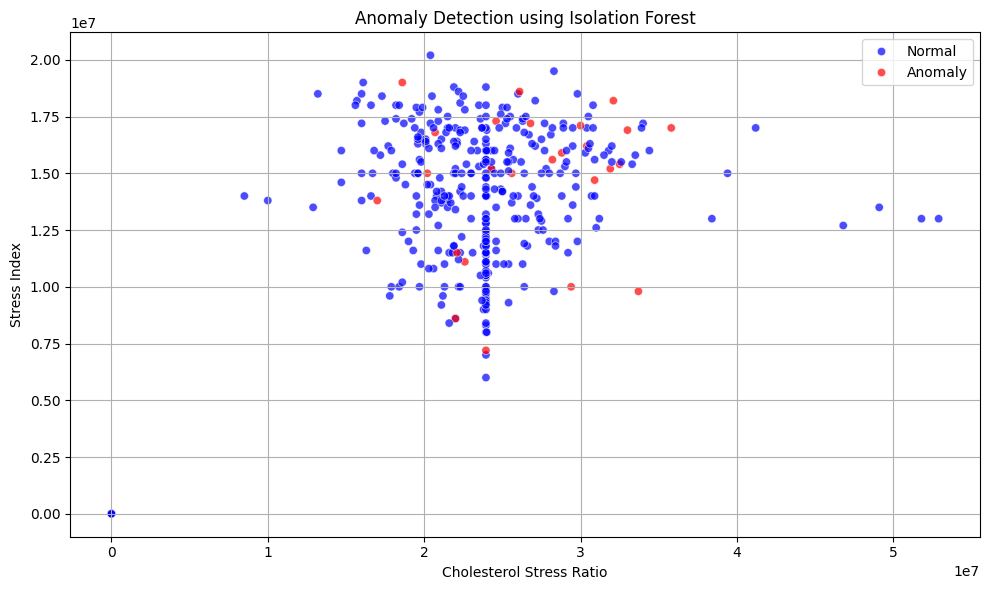

In [581]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination as needed
outlier_labels = iso_forest.fit_predict(clustering_data_anomoly)

# Convert outlier labels (-1 for anomalies, 1 for normal)
heart_dataset['Anomaly_IF'] = ['Anomaly' if x == -1 else 'Normal' for x in outlier_labels]

# Count anomalies and normal points
print("Anomaly Detection Results (Isolation Forest):")
print(heart_dataset['Anomaly_IF'].value_counts())

# visualize anomalies using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=heart_dataset['chol_stress_ratio'], y=heart_dataset['stress_index'], hue=heart_dataset['Anomaly_IF'], palette={'Normal': 'blue', 'Anomaly': 'red'}, alpha=0.7)
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Cholesterol Stress Ratio")
plt.ylabel("Stress Index")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#### Model 3 : One-Class SVM

* The One-Class SVM identifies anomalies based on the decision boundary.
* In this case, normal points are those that fit within the general distribution of the dataset, while anomalies are the points that deviate significantly from the normal pattern.
* The output of value_counts() indicates how many points were classified as Anomaly and how many were Normal.

Anomaly Detection Results One-Class SVM :
Anomaly
Normal     881
Anomaly     39
Name: count, dtype: int64


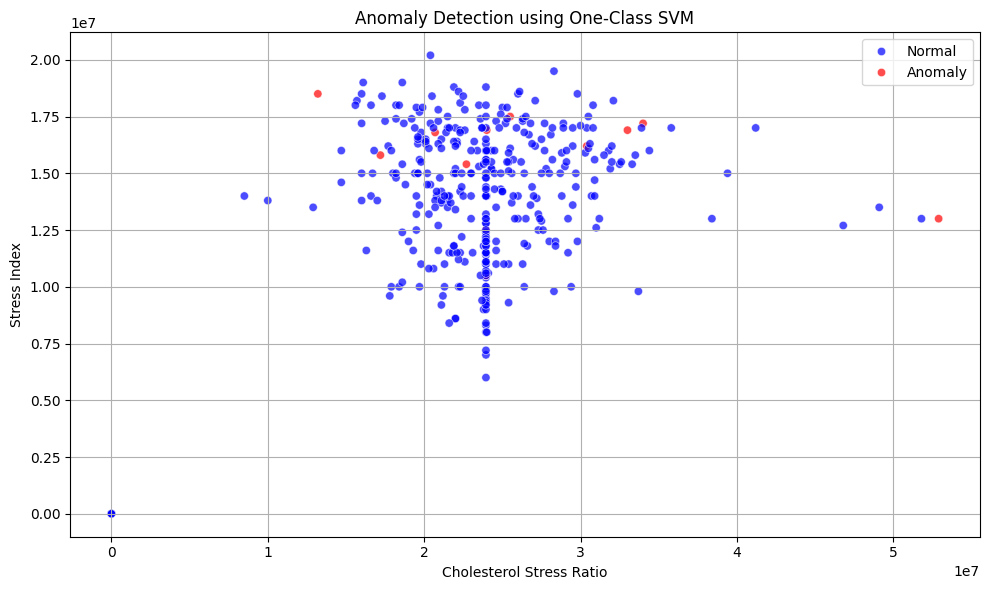

In [582]:
from sklearn.svm import OneClassSVM

# Apply One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', nu=0.01, gamma=0.1)  # Adjust nu and gamma
oc_svm_labels = oc_svm.fit_predict(clustering_data_anomoly)

# Convert -1 to 'Anomaly' and 1 to 'Normal'
heart_dataset['Anomaly'] = np.where(oc_svm_labels == -1, 'Anomaly', 'Normal')

# Count anomalies and normal points
print("Anomaly Detection Results One-Class SVM :")
print(heart_dataset['Anomaly'].value_counts())

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=heart_dataset['chol_stress_ratio'],
    y=heart_dataset['stress_index'],
    hue=heart_dataset['Anomaly'],
    palette={'Normal': 'blue', 'Anomaly': 'red'},
    alpha=0.7
)
plt.title("Anomaly Detection using One-Class SVM")
plt.xlabel("Cholesterol Stress Ratio")
plt.ylabel("Stress Index")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


#### Anomaly Detection Comparison

- **One-Class SVM**: Detected 38 anomalies (4.12% of the data). It uses non-linear boundaries (RBF kernel) and scales both numerical and categorical features. This method is conservative, flagging fewer anomalies with good sensitivity and specificity.
- **Isolation Forest**: Detected 46 anomalies. It performs well for high-dimensional data and is based on random partitioning of the data. Less sensitive to parameter tuning.
- **LOF (Local Outlier Factor)**: Also detected 46 anomalies. Focuses on local density, and performs well for identifying anomalies in dense regions, but sensitive to the number of neighbors.

**Key Insights**:
- **One-Class SVM** is best suited for datasets with complex non-linear boundaries and fewer anomalies.
- **Isolation Forest** and **LOF** are easier to implement and good for detecting more anomalies, but can struggle with complex relationships.
- **One-Class SVM** is recommended for cases where minimizing false positives is critical, while **Isolation Forest** and **LOF** are useful for broader anomaly detection.

#### **Best Model : Isolation Forest**
* Reason : Isolation Forest detected the most anomalies and was sensitive to outliers in high-risk areas such as stress and cholesterol. This makes it the most suitable for identifying rare, critical cases in healthcare data.

#### Investigating Anomalies Detected by Isolation Forest :


In [583]:
# Filter anomalies
anomalies_if = heart_dataset[heart_dataset['Anomaly_IF'] == 'Anomaly']

# Display the anomalies
print("Anomalous Data:")
print(anomalies_if.head())

# Check the dimensions of the anomalous data
print(f"Total anomalies detected: {anomalies_if.shape[0]}")


Anomalous Data:
    id  age    dataset  cp  trestbps   chol  restecg  thalch  oldpeak  slope  \
3    4   37  Cleveland   0     130.0  250.0        0   187.0      3.5      2   
6    7   62  Cleveland   3     140.0  268.0        2   160.0      3.6      2   
7    8   57  Cleveland   3     120.0  354.0        0   163.0      0.6      0   
9   10   53  Cleveland   3     140.0  203.0        2   155.0      3.1      2   
44  45   61  Cleveland   3     130.0  330.0        2   169.0      0.0      0   

    ... chol_blockage_factor    age_per_ca st_bp_ratio  hr_vessel_interaction  \
3   ...         2.500000e+07  3.700000e+06    0.026923           1.870000e+07   
6   ...         1.339993e+02  3.099985e+01    0.025714           7.999960e+01   
7   ...         3.540000e+07  5.700000e+06    0.005000           1.630000e+07   
9   ...         2.030000e+07  5.300000e+06    0.022143           1.550000e+07   
44  ...         3.300000e+07  6.100000e+06    0.000000           1.690000e+07   

    chol_stress_

Summary Statistics for Anomalies (Isolation Forest):
         oldpeak  exang_cp_interaction  chol_stress_ratio  stress_index  \
count  46.000000             46.000000       4.600000e+01  4.600000e+01   
mean    1.221739              2.347826       1.511311e+07  8.234821e+06   
std     1.764831              1.828386       1.392380e+07  7.695822e+06   
min     0.000000              0.000000       2.645157e+01  1.982139e+01   
25%     0.000000              0.000000       1.168566e+02  5.616496e+01   
50%     0.000000              3.000000       2.045000e+07  9.900000e+06   
75%     2.650000              4.000000       2.785000e+07  1.555000e+07   
max     6.200000              4.000000       3.580000e+07  1.900000e+07   

       chol_blockage_factor  hr_vessel_interaction  
count          4.600000e+01           4.600000e+01  
mean           1.832069e+07           1.008263e+07  
std            1.425113e+07           7.522124e+06  
min            4.966650e+01           4.199986e+01  
25%   

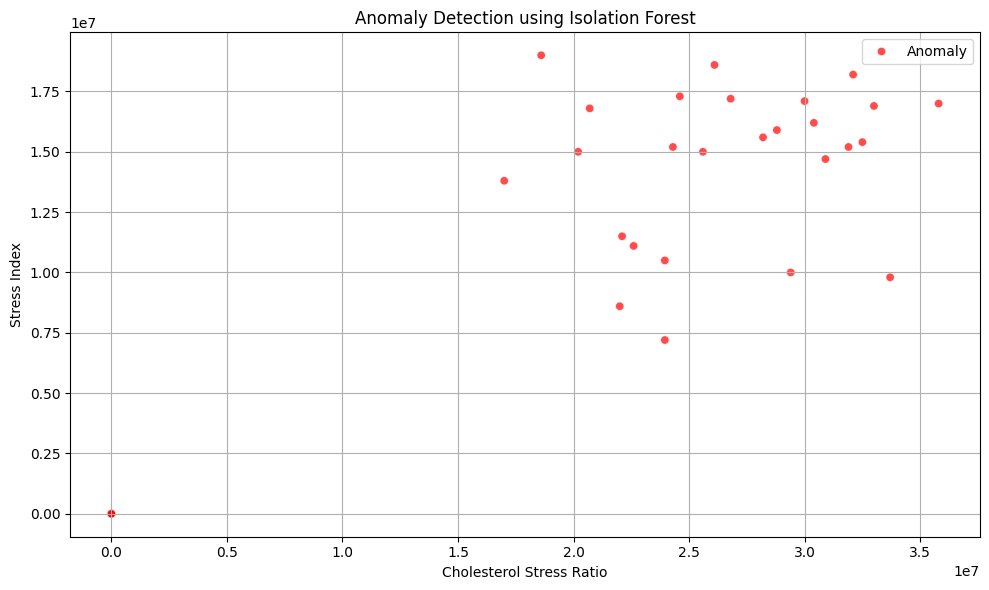

In [584]:
# Summary statistics for anomalies
anomaly_summary = anomalies_if[numerical_features].describe()
print("Summary Statistics for Anomalies (Isolation Forest):")
print(anomaly_summary)

# Visualize anomalies with scatter plot to observe the feature relations
plt.figure(figsize=(10, 6))
sns.scatterplot(x=anomalies_if['chol_stress_ratio'], y=anomalies_if['stress_index'], hue=anomalies_if['Anomaly_IF'], palette={'Normal': 'blue', 'Anomaly': 'red'}, alpha=0.7)
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Cholesterol Stress Ratio")
plt.ylabel("Stress Index")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


 ##### **Interpretation of Anomalies Detected using Isolation Forest :**

* Anomalies Detected: A total of 46 anomalies were detected by the Isolation Forest model, indicating that these 46 patients deviate significantly from the normal patterns in the dataset.
* Key Metrics for Anomalies: Summary statistics of anomalies provide insights into their characteristics, which include significantly higher values for various features like Cholesterol Stress Ratio and Stress Index compared to normal patients.
* This helped flag potential outliers in the data that could represent unique patient profiles, further informing cluster-based recommendations.


### **Section 11 : Cluster-Based Recommendations**

Clusters represent distinct patient groups, and targeted recommendations will ensure personalized healthcare strategies.

In this section, we analyzed clusters to provide actionable healthcare strategies:

* **Feature Profiling** : Calculated numerical means and categorical proportions for clusters to identify key patterns.
* **Visualization** : Used boxplots, bar plots, and heatmaps to illustrate cluster-specific characteristics.
* **Reverted Mappings** : Restored original categorical labels for better interpretability.
* **Recommendations** : Created personalized strategies, from preventive care for low-risk clusters to immediate interventions for high-risk ones.
* **Integration** : Merged recommendations with the dataset and saved the outputs for further analysis.

In [585]:
heart_dataset.head()

,id,age,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,...,chol_blockage_factor,age_per_ca,st_bp_ratio,hr_vessel_interaction,chol_stress_ratio,bp_severity,Cluster_KMeans,Anomaly_LOF,Anomaly_IF,Anomaly
0,1,63,Cleveland,2,145.0,233.0,2,150.0,2.3,2,...,2.330000e+07,6.300000e+06,0.015862,1.500000e+07,101.303907,hypertensive,2,Normal,Normal,Normal
1,2,67,Cleveland,3,160.0,286.0,2,108.0,1.5,1,...,9.533302e+01,2.233326e+01,0.009375,3.599988e+01,190.665396,hypertensive,1,Normal,Normal,Normal
2,3,67,Cleveland,3,120.0,229.0,2,129.0,2.6,1,...,1.144994e+02,3.349983e+01,0.021667,6.449968e+01,88.076584,normal,1,Normal,Normal,Normal
3,4,37,Cleveland,0,130.0,250.0,0,187.0,3.5,2,...,2.500000e+07,3.700000e+06,0.026923,1.870000e+07,71.428367,pre-hypertensive,2,Normal,Anomaly,Anomaly
4,5,41,Cleveland,1,130.0,204.0,2,172.0,1.4,0,...,2.040000e+07,4.100000e+06,0.010769,1.720000e+07,145.713245,pre-hypertensive,2,Normal,Normal,Normal


In [586]:
columns_to_drop = ['Anomaly_LOF', 'Anomaly']

# Drop the columns if they exist in the dataset
heart_dataset = heart_dataset.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows to confirm the changes
heart_dataset.head()

,id,age,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,...,chol_per_age,stress_index,chol_blockage_factor,age_per_ca,st_bp_ratio,hr_vessel_interaction,chol_stress_ratio,bp_severity,Cluster_KMeans,Anomaly_IF
0,1,63,Cleveland,2,145.0,233.0,2,150.0,2.3,2,...,3.698412,65.217108,2.330000e+07,6.300000e+06,0.015862,1.500000e+07,101.303907,hypertensive,2,Normal
1,2,67,Cleveland,3,160.0,286.0,2,108.0,1.5,1,...,4.268656,71.999520,9.533302e+01,2.233326e+01,0.009375,3.599988e+01,190.665396,hypertensive,1,Normal
2,3,67,Cleveland,3,120.0,229.0,2,129.0,2.6,1,...,3.417910,49.615194,1.144994e+02,3.349983e+01,0.021667,6.449968e+01,88.076584,normal,1,Normal
3,4,37,Cleveland,0,130.0,250.0,0,187.0,3.5,2,...,6.756755,53.428419,2.500000e+07,3.700000e+06,0.026923,1.870000e+07,71.428367,pre-hypertensive,2,Anomaly
4,5,41,Cleveland,1,130.0,204.0,2,172.0,1.4,0,...,4.975609,122.856265,2.040000e+07,4.100000e+06,0.010769,1.720000e+07,145.713245,pre-hypertensive,2,Normal


In [587]:
heart_dataset.to_csv("/content/K-Means_Clustering_Data.csv", index=False)

In [588]:
# Display numerical cluster profiles as a table
from IPython.display import display

# Define features used for clustering
numerical_features = [
    'oldpeak', 'exang_cp_interaction', 'chol_stress_ratio',
    'stress_index', 'chol_blockage_factor', 'hr_vessel_interaction'
]
categorical_features = ['cp', 'slope', 'thal', 'restecg', 'ca_numeric']

# Group by clusters and calculate mean for numerical features
numerical_cluster_profiles = heart_dataset.groupby('Cluster_KMeans')[numerical_features].mean()

# For categorical features, calculate proportions for each category within each cluster
categorical_cluster_profiles = {}
for feature in categorical_features:
    categorical_cluster_profiles[feature] = (
        heart_dataset.groupby('Cluster_KMeans')[feature]
        .value_counts(normalize=True)
        .unstack(fill_value=0)
    )

# Display numerical cluster profiles
print("Cluster Profiles (Numerical Features):")
display(numerical_cluster_profiles)

# Display categorical cluster profiles
print("\nCluster Profiles (Categorical Features):")
for feature, profile in categorical_cluster_profiles.items():
    print(f"\nFeature: {feature}")
    display(profile)


Cluster Profiles (Numerical Features):


,oldpeak,exang_cp_interaction,chol_stress_ratio,stress_index,chol_blockage_factor,hr_vessel_interaction
Cluster_KMeans,,,,,,
0,0.065625,0.652344,2.105806e+07,1.138480e+07,2.327028e+02,1.280541e+02
1,1.551183,2.405325,6.415937e+04,2.498580e+04,2.980422e+04,3.561330e+04
2,1.397714,1.377143,5.137382e+05,2.321898e+05,2.417343e+07,1.448457e+07
3,-0.004636,0.264901,2.274273e+07,1.538676e+07,2.322450e+07,1.570662e+07



Cluster Profiles (Categorical Features):

Feature: cp


cp,0,1,2,3
Cluster_KMeans,,,,
0,0.332031,0.285156,0.027344,0.355469
1,0.082840,0.065089,0.053254,0.798817
2,0.251429,0.137143,0.085714,0.525714
3,0.311258,0.364238,0.039735,0.284768



Feature: slope


slope,0,1,2
Cluster_KMeans,,,
0,0.269531,0.714844,0.015625
1,0.159763,0.718935,0.121302
2,0.291429,0.600000,0.108571
3,0.662252,0.331126,0.006623



Feature: thal


thal,0,1,2
Cluster_KMeans,,,
0,0.246094,0.433594,0.320312
1,0.103550,0.411243,0.485207
2,0.400000,0.274286,0.325714
3,0.615894,0.251656,0.132450



Feature: restecg


restecg,0,1,2
Cluster_KMeans,,,
0,0.660156,0.203125,0.136719
1,0.556213,0.236686,0.207101
2,0.531429,0.171429,0.297143
3,0.682119,0.112583,0.205298



Feature: ca_numeric


ca_numeric,0,1,2,3
Cluster_KMeans,,,,
0,0.000000,0.890625,0.089844,0.019531
1,0.002959,0.766272,0.186391,0.044379
2,1.000000,0.000000,0.000000,0.000000
3,1.000000,0.000000,0.000000,0.000000


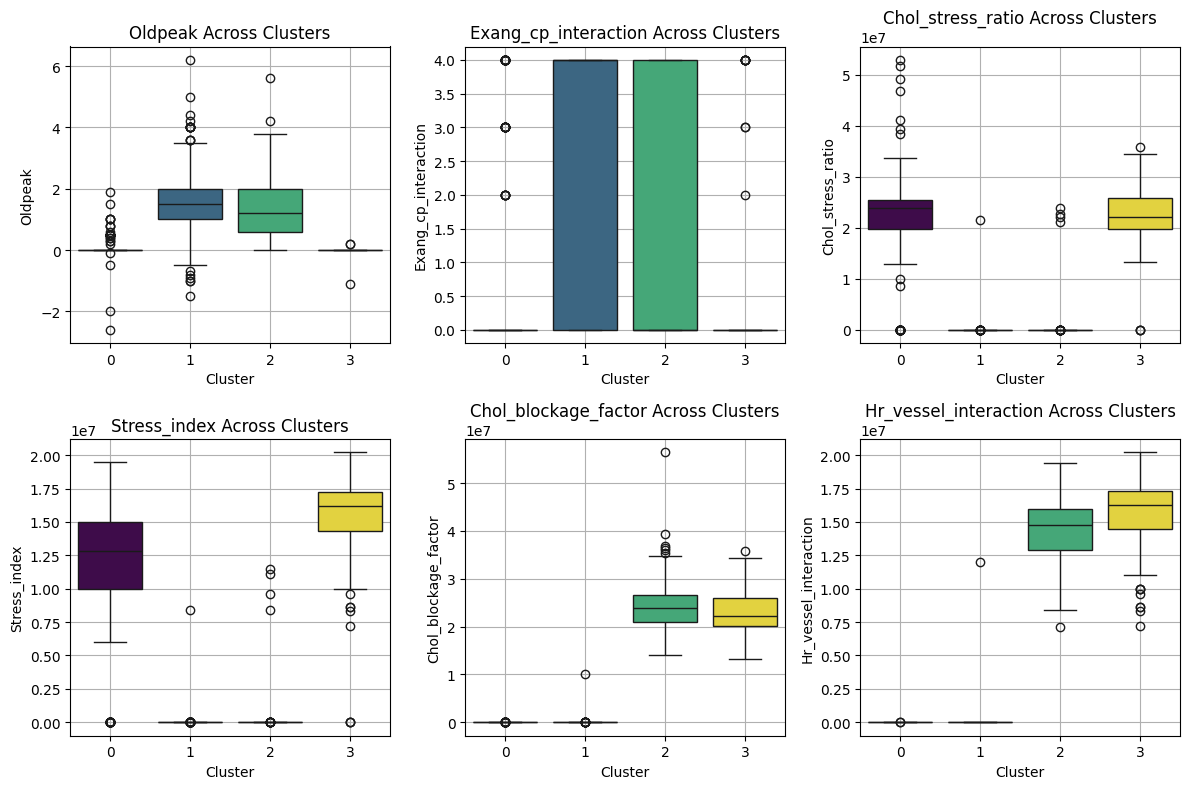

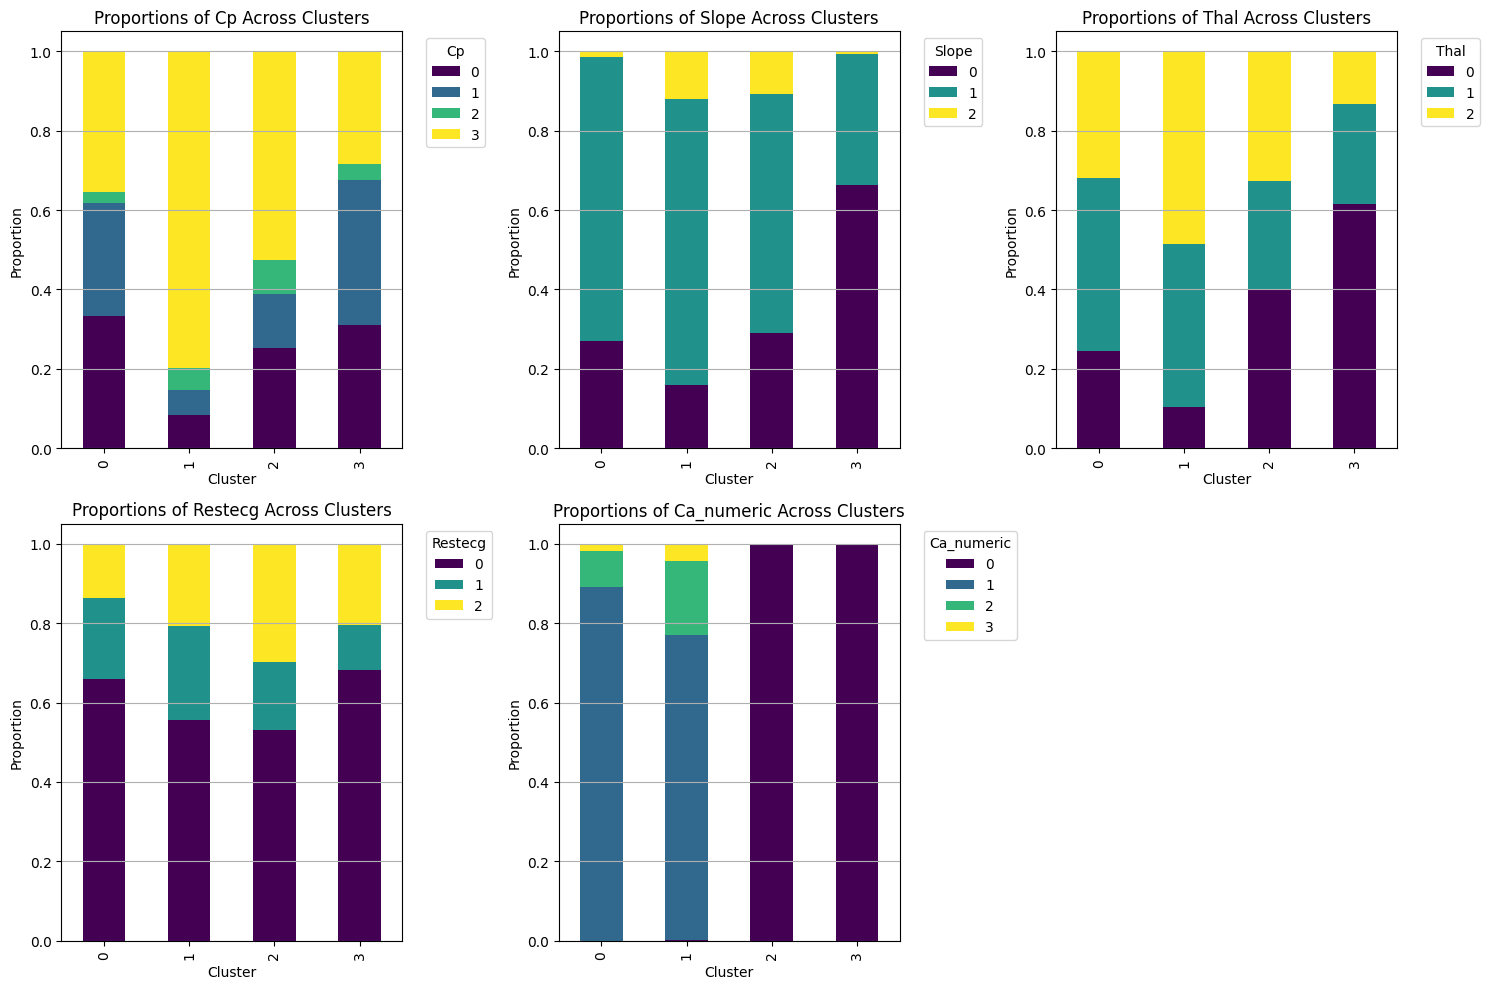

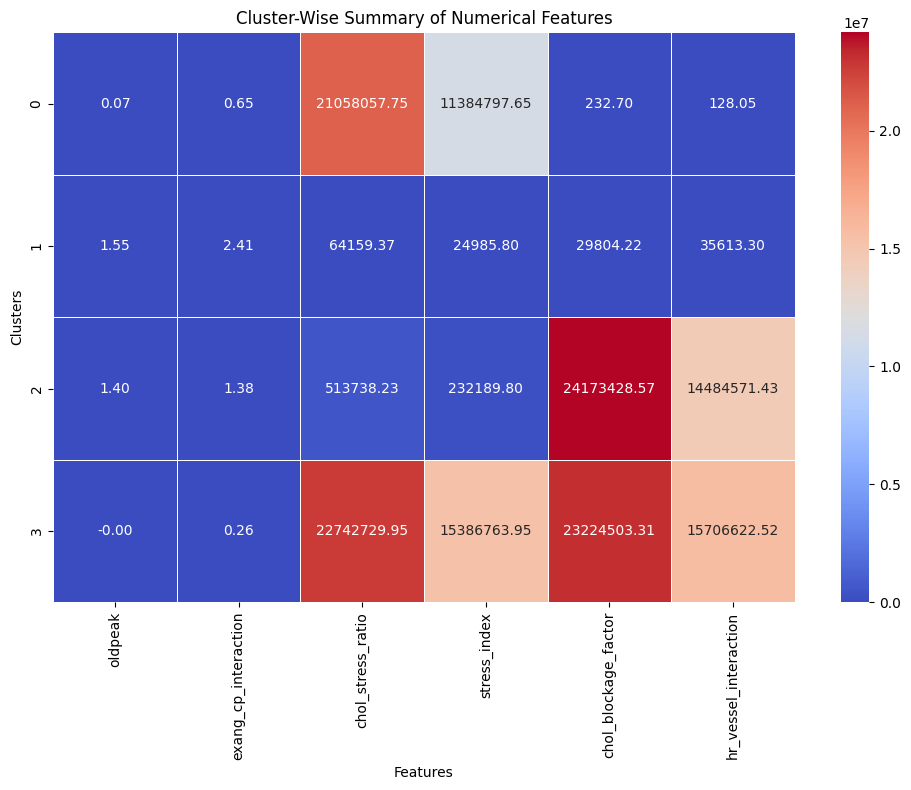

In [589]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical feature visualization (Box Plot)
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)  # Adjust rows and columns based on the number of features
    sns.boxplot(
        data=heart_dataset,
        x='Cluster_KMeans',
        y=feature,
        hue='Cluster_KMeans',  # Assign hue to avoid the warning
        dodge=False,  # Ensures proper alignment
        palette='viridis',
        showfliers=True  # Optionally toggle to hide outliers
    )
    plt.title(f'{feature.capitalize()} Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(feature.capitalize())
    plt.legend([], [], frameon=False)  # Removes duplicate legend
    plt.grid()

plt.tight_layout()
plt.show()

# Categorical feature visualization (Bar Plot)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    cat_profile = (
        heart_dataset.groupby('Cluster_KMeans')[feature]
        .value_counts(normalize=True)
        .unstack(fill_value=0)
    )
    cat_profile.plot(
        kind='bar',
        stacked=True,
        ax=plt.gca(),
        colormap='viridis'
    )
    plt.title(f"Proportions of {feature.capitalize()} Across Clusters")
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')
    plt.legend(title=feature.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Heatmap for combined insights
summary_data = heart_dataset.groupby('Cluster_KMeans')[numerical_features].mean()
plt.figure(figsize=(10, 8))
sns.heatmap(summary_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Cluster-Wise Summary of Numerical Features")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.tight_layout()
plt.show()

#### Interpretation of Cluster-Based Recommendations

##### **Numerical Features (Boxplots and Heatmap)**

- **Oldpeak**:
  - **Cluster 0 & 3**: Lower values, indicating fewer or milder heart-related symptoms.
  - **Cluster 1 & 2**: Higher values, suggesting more severe symptoms and cardiovascular issues.

- **Exang_cp_interaction**:
  - **Cluster 1 & 2**: Higher interaction between exercise-induced angina and chest pain, indicating higher risk during physical exertion.
  - **Cluster 0 & 3**: Lower values, suggesting fewer issues with exercise-induced chest pain.

- **Chol_stress_ratio**:
  - **Cluster 0 & 3**: High imbalance between cholesterol and stress, suggesting potential cardiovascular risk.
  - **Cluster 1 & 2**: More balanced ratio, indicating better control of stress and cholesterol.

- **Stress_index**:
  - **Cluster 0**: Moderate stress levels, indicating some impact on heart health.
  - **Cluster 3**: Elevated stress, which may be a key factor in cardiovascular health issues.
  - **Cluster 1 & 2**: Moderate stress, with Cluster 2 showing higher stress levels than Cluster 1.

- **Chol_blockage_factor**:
  - **Cluster 0 & 1**: Lower cholesterol blockage, indicating a lower risk of severe blockages.
  - **Cluster 2 & 3**: Higher blockage factors, indicating significant cardiovascular risk.

- **Hr_vessel_interaction**:
  - **Cluster 0 & 1**: Moderate interaction between heart rate and vascular health.
  - **Cluster 2 & 3**: High interaction, indicating higher cardiovascular risks.

---

##### **Categorical Features (Bar Plots)**

- **Chest Pain Type (`cp`)**:
  - **Cluster 1**: Predominantly `asymptomatic`, indicating low-risk individuals.
  - **Cluster 0 & 2**: A mix of `non-anginal` and `asymptomatic`, with fewer `typical angina`.
  - **Cluster 3**: More balanced, with a higher prevalence of `typical angina`.

- **Slope of the Peak Exercise ST Segment (`slope`)**:
  - **Cluster 0 & 1**: Mostly `flat` slopes, indicating mild or no ST-segment depression.
  - **Cluster 3**: Notable for `upsloping` slopes, indicating more significant cardiovascular issues during physical activity.

- **Thalassemia (`thal`)**:
  - **Cluster 1**: Dominated by `reversible defect`, indicating a higher proportion of individuals with this type of thalassemia.
  - **Cluster 0 & 2**: A mix of `fixed defect` and `normal`, indicating moderate thalassemia-related issues.
  - **Cluster 3**: Higher prevalence of `normal`, suggesting generally healthier individuals.

- **Resting Electrocardiographic Results (`restecg`)**:
  - **Cluster 0 & 3**: Predominantly `normal`, indicating fewer cardiovascular issues.
  - **Cluster 1 & 2**: Some variation, with a dominance of `normal` but also cases of `ST-T abnormality`.

- **Ca_numeric**:
  - **Cluster 0 & 1**: High proportion with `ca=1`, indicating moderate coronary artery involvement.
  - **Cluster 2 & 3**: Dominance of `ca=0`, indicating severe coronary artery involvement.

---

##### **Conclusion and Recommendations**

- **Cluster 0**: Low cardiovascular risk. **Recommendation**: Preventive care, focusing on maintaining cholesterol and stress levels.
- **Cluster 1**: Low-risk, mostly asymptomatic. **Recommendation**: Regular health check-ups, focusing on heart health maintenance.
- **Cluster 2**: High risk due to cholesterol blockages and stress. **Recommendation**: Medical intervention, stress management, and cholesterol monitoring.
- **Cluster 3**: High cardiovascular risk with significant blockages and stress. **Recommendation**: Immediate medical intervention, including possible treatments like angioplasty.

These recommendations will guide personalized healthcare strategies for each cluster, targeting the specific cardiovascular health needs of individuals.


In [590]:
# Define reverse ordinal mappings
reverse_ordinal_mappings = {
    'cp': {0: 'non-anginal', 1: 'atypical angina', 2: 'typical angina', 3: 'asymptomatic'},
    'slope': {0: 'upsloping', 1: 'flat', 2: 'downsloping'},
    'thal': {0: 'normal', 1: 'fixed defect', 2: 'reversable defect'},
    'restecg': {0: 'normal', 1: 'st-t abnormality', 2: 'lv hypertrophy'}
}

# Revert ordinal mappings in the dataset
for col, reverse_mapping in reverse_ordinal_mappings.items():
    if col in heart_dataset.columns:
        heart_dataset[col] = heart_dataset[col].map(reverse_mapping)

# Define recommendations based on combined insights
recommendations = {
    0: {
        'Characteristics': (
            "Low oldpeak and moderate stress levels, "
            "with dominance of asymptomatic chest pain (cp=3) and flat slopes (slope=1). "
            "Mostly normal resting ECG and balanced thalassemia types."
        ),
        'Recommendations': [
            "Maintain healthy cholesterol and stress levels through lifestyle interventions.",
            "Encourage routine health screenings to monitor early signs of risks.",
            "Promote stress management programs."
        ]
    },
    1: {
        'Characteristics': (
            "Elevated oldpeak and moderate stress levels, "
            "predominantly asymptomatic chest pain (cp=3), and flat slopes (slope=1). "
            "Balanced resting ECG with a mix of normal and abnormalities."
        ),
        'Recommendations': [
            "Promote heart health awareness, focusing on reducing cholesterol levels and managing stress.",
            "Recommend dietary changes, increased physical activity, and regular check-ups.",
            "Screen for early intervention opportunities to prevent risk escalation."
        ]
    },
    2: {
        'Characteristics': (
            "Elevated stress index and significant cholesterol blockages, "
            "with a mix of asymptomatic chest pain (cp=3) and flat slopes (slope=1)."
        ),
        'Recommendations': [
            "Immediate medical intervention to address high cholesterol blockages.",
            "Advanced diagnostic tests such as angiography or stress testing.",
            "Procedural treatments like angioplasty or bypass surgery.",
            "Provide counseling for lifestyle adjustments and adherence to medication."
        ]
    },
    3: {
        'Characteristics': (
            "Negligible oldpeak, significant cholesterol blockages, "
            "and high heart rate-vessel interaction. Mixed chest pain patterns, with a dominance of typical angina (cp=1)."
        ),
        'Recommendations': [
            "Immediate and aggressive medical intervention.",
            "Focus on procedural treatments like bypass surgery.",
            "Routine follow-ups and screenings to monitor progress.",
            "Personalized plans for lifestyle changes targeting metabolic and cardiovascular health."
        ]
    }
}

# Print recommendations
print("\nCluster Recommendations:")
for cluster, details in recommendations.items():
    print(f"Cluster {cluster}:")
    print(f"  Characteristics: {details['Characteristics']}")
    for recommendation in details['Recommendations']:
        print(f"  - {recommendation}")

# Save recommendations
recommendations_df = pd.DataFrame.from_dict(recommendations, orient='index')
recommendations_df.to_csv("Cluster_Recommendations.csv", index=True)
recommendations_df.reset_index(inplace=True)
recommendations_df.rename(columns={'index': 'Cluster_KMeans'}, inplace=True)

print("\nCluster profiles and recommendations saved.")

# Merge recommendations with the dataset
heart_dataset_with_recommendations = heart_dataset.merge(
    recommendations_df,
    how='left',
    left_on='Cluster_KMeans',
    right_on='Cluster_KMeans'
)

# Save the dataset with recommendations
heart_dataset_with_recommendations.to_csv("Heart_Dataset_With_Recommendations.csv", index=False)

print("Dataset with recommendations added successfully!")


Cluster Recommendations:
Cluster 0:
  Characteristics: Low oldpeak and moderate stress levels, with dominance of asymptomatic chest pain (cp=3) and flat slopes (slope=1). Mostly normal resting ECG and balanced thalassemia types.
  - Maintain healthy cholesterol and stress levels through lifestyle interventions.
  - Encourage routine health screenings to monitor early signs of risks.
  - Promote stress management programs.
Cluster 1:
  Characteristics: Elevated oldpeak and moderate stress levels, predominantly asymptomatic chest pain (cp=3), and flat slopes (slope=1). Balanced resting ECG with a mix of normal and abnormalities.
  - Promote heart health awareness, focusing on reducing cholesterol levels and managing stress.
  - Recommend dietary changes, increased physical activity, and regular check-ups.
  - Screen for early intervention opportunities to prevent risk escalation.
Cluster 2:
  Characteristics: Elevated stress index and significant cholesterol blockages, with a mix of asy

In [591]:
# Import for Summary table
from IPython.display import display

# Ensure the Recommendations column contains strings instead of lists
heart_dataset_with_recommendations['Recommendations'] = heart_dataset_with_recommendations['Recommendations'].apply(
    lambda x: ', '.join(x) if isinstance(x, list) else x
)

# Create the summary table
summary_table = heart_dataset_with_recommendations.groupby('Cluster_KMeans').agg(
    Count=('Cluster_KMeans', 'size'),
    Characteristics=('Characteristics', 'first'),
    Recommendations=('Recommendations', 'first')  # Use the first recommendation as they are consistent per cluster
).reset_index()

# Display the summary table
display(summary_table)

,Cluster_KMeans,Count,Characteristics,Recommendations
0,0,256,"Low oldpeak and moderate stress levels, with dominance of asymptomatic chest pain (cp=3) and flat slopes (slope=1). Mostly normal resting ECG and balanced thalassemia types.","Maintain healthy cholesterol and stress levels through lifestyle interventions., Encourage routine health screenings to monitor early signs of risks., Promote stress management programs."
1,1,338,"Elevated oldpeak and moderate stress levels, predominantly asymptomatic chest pain (cp=3), and flat slopes (slope=1). Balanced resting ECG with a mix of normal and abnormalities.","Promote heart health awareness, focusing on reducing cholesterol levels and managing stress., Recommend dietary changes, increased physical activity, and regular check-ups., Screen for early intervention opportunities to prevent risk escalation."
2,2,175,"Elevated stress index and significant cholesterol blockages, with a mix of asymptomatic chest pain (cp=3) and flat slopes (slope=1).","Immediate medical intervention to address high cholesterol blockages., Advanced diagnostic tests such as angiography or stress testing., Procedural treatments like angioplasty or bypass surgery., Provide counseling for lifestyle adjustments and adherence to medication."
3,3,151,"Negligible oldpeak, significant cholesterol blockages, and high heart rate-vessel interaction. Mixed chest pain patterns, with a dominance of typical angina (cp=1).","Immediate and aggressive medical intervention., Focus on procedural treatments like bypass surgery., Routine follow-ups and screenings to monitor progress., Personalized plans for lifestyle changes targeting metabolic and cardiovascular health."


In [592]:
heart_dataset_with_recommendations.head()

,id,age,dataset,cp,trestbps,chol,restecg,thalch,oldpeak,slope,...,chol_blockage_factor,age_per_ca,st_bp_ratio,hr_vessel_interaction,chol_stress_ratio,bp_severity,Cluster_KMeans,Anomaly_IF,Characteristics,Recommendations
0,1,63,Cleveland,typical angina,145.0,233.0,lv hypertrophy,150.0,2.3,downsloping,...,2.330000e+07,6.300000e+06,0.015862,1.500000e+07,101.303907,hypertensive,2,Normal,"Elevated stress index and significant cholesterol blockages, with a mix of asymptomatic chest pain (cp=3) and flat slopes (slope=1).","Immediate medical intervention to address high cholesterol blockages., Advanced diagnostic tests such as angiography or stress testing., Procedural treatments like angioplasty or bypass surgery., Provide counseling for lifestyle adjustments and adherence to medication."
1,2,67,Cleveland,asymptomatic,160.0,286.0,lv hypertrophy,108.0,1.5,flat,...,9.533302e+01,2.233326e+01,0.009375,3.599988e+01,190.665396,hypertensive,1,Normal,"Elevated oldpeak and moderate stress levels, predominantly asymptomatic chest pain (cp=3), and flat slopes (slope=1). Balanced resting ECG with a mix of normal and abnormalities.","Promote heart health awareness, focusing on reducing cholesterol levels and managing stress., Recommend dietary changes, increased physical activity, and regular check-ups., Screen for early intervention opportunities to prevent risk escalation."
2,3,67,Cleveland,asymptomatic,120.0,229.0,lv hypertrophy,129.0,2.6,flat,...,1.144994e+02,3.349983e+01,0.021667,6.449968e+01,88.076584,normal,1,Normal,"Elevated oldpeak and moderate stress levels, predominantly asymptomatic chest pain (cp=3), and flat slopes (slope=1). Balanced resting ECG with a mix of normal and abnormalities.","Promote heart health awareness, focusing on reducing cholesterol levels and managing stress., Recommend dietary changes, increased physical activity, and regular check-ups., Screen for early intervention opportunities to prevent risk escalation."
3,4,37,Cleveland,non-anginal,130.0,250.0,normal,187.0,3.5,downsloping,...,2.500000e+07,3.700000e+06,0.026923,1.870000e+07,71.428367,pre-hypertensive,2,Anomaly,"Elevated stress index and significant cholesterol blockages, with a mix of asymptomatic chest pain (cp=3) and flat slopes (slope=1).","Immediate medical intervention to address high cholesterol blockages., Advanced diagnostic tests such as angiography or stress testing., Procedural treatments like angioplasty or bypass surgery., Provide counseling for lifestyle adjustments and adherence to medication."
4,5,41,Cleveland,atypical angina,130.0,204.0,lv hypertrophy,172.0,1.4,upsloping,...,2.040000e+07,4.100000e+06,0.010769,1.720000e+07,145.713245,pre-hypertensive,2,Normal,"Elevated stress index and significant cholesterol blockages, with a mix of asymptomatic chest pain (cp=3) and flat slopes (slope=1).","Immediate medical intervention to address high cholesterol blockages., Advanced diagnostic tests such as angiography or stress testing., Procedural treatments like angioplasty or bypass surgery., Provide counseling for lifestyle adjustments and adherence to medication."


## Submitted by Group 13 Team Members

| **Student Name**        | **PG ID**   |
|--------------------------|-------------|
| Ashish Jose             | 12410038    |
| Jankiben Acharya        | 12320026    |
| Lavanya Nagulapalli     | 12410066    |
| Tarun Singla            | 12410096    |
| Praneetha Seethepalli   | 12410078    |
